# Analysis of the MIMIC III Clinical Database
### https://github.com/DanielSola/mimic-iii-project
### https://medium.com/@daniel.sola.fraire/predicting-patient-mortality-with-deep-learning-f9814bf192da

In this notebook, I explore patient data from the MIMIC III clinical database to understand patterns that might exist across different health profiles. The analysis involves cleaning and organizing information like demographics, vital signs, and lab test results, then using clustering techniques such as K Means and Hierarchical Clustering to group patients based on similarities. The goal is to identify meaningful patterns that could relate to clinical outcomes, and to better understand how certain groups of patients might respond differently in a medical setting.

The MIMIC III Clinical Database, which contains health records for around 40,000 patients collected over a period of 11 years. The aim was to apply unsupervised learning through clustering techniques to explore patterns and groupings within patient health data. The analysis focused on three key datasets: Demographics, Lab Tests, and Vital Signs.

The process began with thorough data preparation, which included merging individual files, handling missing values, converting categorical variables into numerical format, and standardizing the numerical features. Following this, clustering techniques such as K Means and Hierarchical Clustering were used to group similar patient profiles. These methods were assessed based on their ability to reveal underlying structure in the data without using predefined labels.

In [174]:
import pandas as pd
import os

In [175]:
folder_path = 'D:/NEU/S2/IE 6400/Project Dataset/mimic-iii-project/mimic_data/New folder'

In [176]:
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
csv_files

['ALBUMIN.csv',
 'ART_PH.csv',
 'BICARBONATE.csv',
 'BLOOD_GLUCOSE.csv',
 'BLOOD_UREA_NITROGEN.csv',
 'CREATININE.csv',
 'CVP.csv',
 'DEMO_DATA.csv',
 'DIAS_PRESS.csv',
 'HEMATROCRIT.csv',
 'HR.csv',
 'PLATELET_COUNT.csv',
 'POTASSSIUM.csv',
 'RESP_RATE.csv',
 'SODIUM.csv',
 'SPO2.csv',
 'SYS_PRESS.csv',
 'TEMP.csv',
 'WHITE_BLOOD_CELLS.csv']

In [177]:
merged_df = pd.DataFrame()

In [178]:
for i, file in enumerate(csv_files):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, sep='\t')  # Read the tab-separated CSV file

    df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
        
    if i == 0:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on='hadm_id', how='outer')  # Use 'outer' to keep all data

In [179]:
merged_df.shape

(58977, 42)

In [180]:
merged_df.head(10)

,hadm_id,avg_albumin,std_albumin,avg_art_ph,std_art_ph,avg_bicarbonate,std_bicarbonate,avg_blood_glucose,std_blood_glucose,avg_blood_urea_nitrogen,...,avg_sodium,std_sodium,avg_spo2,std_spo2,avg_sys_press,std_sys_press,avg_temp,std_temp,avg_white_blood_cells,std_white_blood_cells
0,100001.0,NaN,NaN,NaN,NaN,19.714286,4.232267,165.428571,80.236875,28.571429,...,139.571429,3.251373,97.604167,0.961815,174.191781,21.503654,NaN,NaN,10.400000,3.281260
1,100003.0,2.40,0.173205,NaN,NaN,19.666667,3.983298,96.833333,26.798632,34.500000,...,132.000000,1.264911,98.229167,2.746290,116.519231,17.056412,NaN,NaN,13.328571,2.566265
2,100006.0,2.00,NaN,7.38,0.036515,29.384615,3.990373,105.000000,33.578267,17.076923,...,131.384615,1.980676,97.861789,2.564976,140.509434,12.972678,NaN,NaN,9.700000,2.840188
3,100007.0,NaN,NaN,NaN,NaN,24.888889,1.833333,118.333333,28.748913,14.222222,...,139.111111,2.713137,97.960526,2.187484,140.746835,12.303292,NaN,NaN,7.375000,2.292690
4,100009.0,4.30,NaN,NaN,NaN,25.200000,1.923538,152.235294,42.697379,17.000000,...,137.714286,3.039424,96.174603,2.028345,110.543860,12.652033,NaN,NaN,12.385714,2.927131
5,100010.0,NaN,NaN,NaN,NaN,25.000000,1.825742,111.625000,18.577540,11.000000,...,137.500000,1.914854,99.378378,1.621922,100.553846,20.720635,NaN,NaN,10.125000,3.430622
6,100011.0,2.45,0.070711,NaN,NaN,27.187500,2.286737,132.458333,19.834049,11.764706,...,138.037037,1.911131,99.094915,1.978922,143.305369,16.706338,NaN,NaN,11.829412,3.451044
7,100012.0,3.85,0.353553,NaN,NaN,26.555556,3.778595,111.166667,14.288004,12.909091,...,132.928571,2.164905,98.096774,3.297115,115.642105,14.140568,NaN,NaN,8.930769,2.450301
8,100014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100016.0,1.60,NaN,NaN,NaN,24.000000,1.069045,81.750000,14.829989,42.000000,...,134.750000,2.187628,98.871622,1.526547,113.839161,14.247634,NaN,NaN,10.485714,1.345893


In [181]:
merged_df.dtypes

hadm_id                    float64
avg_albumin                float64
std_albumin                float64
avg_art_ph                 float64
std_art_ph                 float64
avg_bicarbonate            float64
std_bicarbonate            float64
avg_blood_glucose          float64
std_blood_glucose          float64
avg_blood_urea_nitrogen    float64
std_blood_urea_nitrogen    float64
avg_creatinine             float64
std_creatinine             float64
avg_cvp                    float64
std_cvp                    float64
age                        float64
gender                      object
marital_status              object
religion                    object
ethnicity                   object
avg_dias_press             float64
std_dias_press             float64
avg_hematrocrit            float64
std_hematrocrit            float64
avg_hr                     float64
std_hr                     float64
avg_platelet_count         float64
std_platelet_count         float64
avg_potasssium      

In [182]:
merged_df.isnull().sum()

hadm_id                        1
avg_albumin                27980
std_albumin                42707
avg_art_ph                 40914
std_art_ph                 43947
avg_bicarbonate             6151
std_bicarbonate             8403
avg_blood_glucose           8323
std_blood_glucose           9488
avg_blood_urea_nitrogen     7968
std_blood_urea_nitrogen     9377
avg_creatinine              7980
std_creatinine              9375
avg_cvp                    40551
std_cvp                    40710
age                            1
gender                         1
marital_status                 1
religion                       1
ethnicity                      1
avg_dias_press              9942
std_dias_press              9961
avg_hematrocrit             1874
std_hematrocrit             8035
avg_hr                      2263
std_hr                      4130
avg_platelet_count          2002
std_platelet_count          8449
avg_potasssium              6100
std_potasssium              8263
avg_resp_r

In [183]:
df['hadm_id'].isnull().sum()

1

In [184]:
df[df['hadm_id'].isnull()]

,hadm_id,avg_white_blood_cells,std_white_blood_cells
9,NaN,7.870552,6.540554


In [185]:
merged_df = merged_df.drop(columns=['avg_albumin', 'std_albumin', 'avg_art_ph', 'std_art_ph', 'avg_cvp', 'std_cvp', 'avg_temp', 'std_temp'])

In [186]:
merged_df.isnull().sum()

hadm_id                        1
avg_bicarbonate             6151
std_bicarbonate             8403
avg_blood_glucose           8323
std_blood_glucose           9488
avg_blood_urea_nitrogen     7968
std_blood_urea_nitrogen     9377
avg_creatinine              7980
std_creatinine              9375
age                            1
gender                         1
marital_status                 1
religion                       1
ethnicity                      1
avg_dias_press              9942
std_dias_press              9961
avg_hematrocrit             1874
std_hematrocrit             8035
avg_hr                      2263
std_hr                      4130
avg_platelet_count          2002
std_platelet_count          8449
avg_potasssium              6100
std_potasssium              8263
avg_resp_rate               2308
std_resp_rate               4228
avg_sodium                  6117
std_sodium                  8366
avg_spo2                    9976
std_spo2                   10019
avg_sys_pr

In [187]:
merged_df.shape

(58977, 34)

In [188]:
merged_df=merged_df.dropna()

In [189]:
merged_df.shape

(47328, 34)

In [190]:
merged_df.isnull().sum()

hadm_id                    0
avg_bicarbonate            0
std_bicarbonate            0
avg_blood_glucose          0
std_blood_glucose          0
avg_blood_urea_nitrogen    0
std_blood_urea_nitrogen    0
avg_creatinine             0
std_creatinine             0
age                        0
gender                     0
marital_status             0
religion                   0
ethnicity                  0
avg_dias_press             0
std_dias_press             0
avg_hematrocrit            0
std_hematrocrit            0
avg_hr                     0
std_hr                     0
avg_platelet_count         0
std_platelet_count         0
avg_potasssium             0
std_potasssium             0
avg_resp_rate              0
std_resp_rate              0
avg_sodium                 0
std_sodium                 0
avg_spo2                   0
std_spo2                   0
avg_sys_press              0
std_sys_press              0
avg_white_blood_cells      0
std_white_blood_cells      0
dtype: int64

In [191]:
merged_df.head()

,hadm_id,avg_bicarbonate,std_bicarbonate,avg_blood_glucose,std_blood_glucose,avg_blood_urea_nitrogen,std_blood_urea_nitrogen,avg_creatinine,std_creatinine,age,...,avg_resp_rate,std_resp_rate,avg_sodium,std_sodium,avg_spo2,std_spo2,avg_sys_press,std_sys_press,avg_white_blood_cells,std_white_blood_cells
0,100001.0,19.714286,4.232267,165.428571,80.236875,28.571429,11.830302,2.214286,0.217882,35.499973,...,17.357143,2.560263,139.571429,3.251373,97.604167,0.961815,174.191781,21.503654,10.400000,3.281260
1,100003.0,19.666667,3.983298,96.833333,26.798632,34.500000,16.071714,1.083333,0.147196,59.952462,...,15.818182,2.815900,132.000000,1.264911,98.229167,2.746290,116.519231,17.056412,13.328571,2.566265
2,100006.0,29.384615,3.990373,105.000000,33.578267,17.076923,3.226493,0.638462,0.076795,48.949751,...,18.647059,3.330873,131.384615,1.980676,97.861789,2.564976,140.509434,12.972678,9.700000,2.840188
3,100007.0,24.888889,1.833333,118.333333,28.748913,14.222222,3.231787,0.666667,0.086603,73.871866,...,19.185185,4.461253,139.111111,2.713137,97.960526,2.187484,140.746835,12.303292,7.375000,2.292690
4,100009.0,25.200000,1.923538,152.235294,42.697379,17.000000,3.633180,0.783333,0.040825,60.837435,...,23.515625,6.409299,137.714286,3.039424,96.174603,2.028345,110.543860,12.652033,12.385714,2.927131


In [192]:
merged_df = merged_df.drop(columns=['std_bicarbonate', 'std_blood_glucose', 'std_blood_urea_nitrogen', 'std_creatinine', 'std_dias_press', 'std_hematrocrit', 'std_hr', 'std_platelet_count', 'std_potasssium', 'std_resp_rate', 'std_sodium', 'std_spo2', 'std_sys_press', 'std_white_blood_cells' ])

In [193]:
merged_df.isnull().sum()

hadm_id                    0
avg_bicarbonate            0
avg_blood_glucose          0
avg_blood_urea_nitrogen    0
avg_creatinine             0
age                        0
gender                     0
marital_status             0
religion                   0
ethnicity                  0
avg_dias_press             0
avg_hematrocrit            0
avg_hr                     0
avg_platelet_count         0
avg_potasssium             0
avg_resp_rate              0
avg_sodium                 0
avg_spo2                   0
avg_sys_press              0
avg_white_blood_cells      0
dtype: int64

In [194]:
merged_df.shape

(47328, 20)

In [195]:
merged_df.head()

,hadm_id,avg_bicarbonate,avg_blood_glucose,avg_blood_urea_nitrogen,avg_creatinine,age,gender,marital_status,religion,ethnicity,avg_dias_press,avg_hematrocrit,avg_hr,avg_platelet_count,avg_potasssium,avg_resp_rate,avg_sodium,avg_spo2,avg_sys_press,avg_white_blood_cells
0,100001.0,19.714286,165.428571,28.571429,2.214286,35.499973,F,DIVORCED/SEPARATED,CHRISTIAN,WHITE,92.780822,32.157143,111.313953,364.428571,4.035714,17.357143,139.571429,97.604167,174.191781,10.400000
1,100003.0,19.666667,96.833333,34.500000,1.083333,59.952462,M,SINGLE,NONE,WHITE,60.615385,27.781818,81.218182,145.285714,4.783333,15.818182,132.000000,98.229167,116.519231,13.328571
2,100006.0,29.384615,105.000000,17.076923,0.638462,48.949751,F,SINGLE,NONE,BLACK,82.169811,31.853846,108.630252,228.615385,4.076923,18.647059,131.384615,97.861789,140.509434,9.700000
3,100007.0,24.888889,118.333333,14.222222,0.666667,73.871866,F,MARRIED,JEWISH/HEBREW,WHITE,67.164557,30.600000,79.444444,199.750000,3.955556,19.185185,139.111111,97.960526,140.746835,7.375000
4,100009.0,25.200000,152.235294,17.000000,0.783333,60.837435,M,MARRIED,CHRISTIAN,WHITE,51.175439,35.914286,68.968750,142.571429,4.242857,23.515625,137.714286,96.174603,110.543860,12.385714


In [196]:
merged_df.shape

(47328, 20)

In [197]:
merged_df.head()

,hadm_id,avg_bicarbonate,avg_blood_glucose,avg_blood_urea_nitrogen,avg_creatinine,age,gender,marital_status,religion,ethnicity,avg_dias_press,avg_hematrocrit,avg_hr,avg_platelet_count,avg_potasssium,avg_resp_rate,avg_sodium,avg_spo2,avg_sys_press,avg_white_blood_cells
0,100001.0,19.714286,165.428571,28.571429,2.214286,35.499973,F,DIVORCED/SEPARATED,CHRISTIAN,WHITE,92.780822,32.157143,111.313953,364.428571,4.035714,17.357143,139.571429,97.604167,174.191781,10.400000
1,100003.0,19.666667,96.833333,34.500000,1.083333,59.952462,M,SINGLE,NONE,WHITE,60.615385,27.781818,81.218182,145.285714,4.783333,15.818182,132.000000,98.229167,116.519231,13.328571
2,100006.0,29.384615,105.000000,17.076923,0.638462,48.949751,F,SINGLE,NONE,BLACK,82.169811,31.853846,108.630252,228.615385,4.076923,18.647059,131.384615,97.861789,140.509434,9.700000
3,100007.0,24.888889,118.333333,14.222222,0.666667,73.871866,F,MARRIED,JEWISH/HEBREW,WHITE,67.164557,30.600000,79.444444,199.750000,3.955556,19.185185,139.111111,97.960526,140.746835,7.375000
4,100009.0,25.200000,152.235294,17.000000,0.783333,60.837435,M,MARRIED,CHRISTIAN,WHITE,51.175439,35.914286,68.968750,142.571429,4.242857,23.515625,137.714286,96.174603,110.543860,12.385714


In [198]:
merged_df_copy = merged_df

In [199]:
merged_df_copy.head(5)

,hadm_id,avg_bicarbonate,avg_blood_glucose,avg_blood_urea_nitrogen,avg_creatinine,age,gender,marital_status,religion,ethnicity,avg_dias_press,avg_hematrocrit,avg_hr,avg_platelet_count,avg_potasssium,avg_resp_rate,avg_sodium,avg_spo2,avg_sys_press,avg_white_blood_cells
0,100001.0,19.714286,165.428571,28.571429,2.214286,35.499973,F,DIVORCED/SEPARATED,CHRISTIAN,WHITE,92.780822,32.157143,111.313953,364.428571,4.035714,17.357143,139.571429,97.604167,174.191781,10.400000
1,100003.0,19.666667,96.833333,34.500000,1.083333,59.952462,M,SINGLE,NONE,WHITE,60.615385,27.781818,81.218182,145.285714,4.783333,15.818182,132.000000,98.229167,116.519231,13.328571
2,100006.0,29.384615,105.000000,17.076923,0.638462,48.949751,F,SINGLE,NONE,BLACK,82.169811,31.853846,108.630252,228.615385,4.076923,18.647059,131.384615,97.861789,140.509434,9.700000
3,100007.0,24.888889,118.333333,14.222222,0.666667,73.871866,F,MARRIED,JEWISH/HEBREW,WHITE,67.164557,30.600000,79.444444,199.750000,3.955556,19.185185,139.111111,97.960526,140.746835,7.375000
4,100009.0,25.200000,152.235294,17.000000,0.783333,60.837435,M,MARRIED,CHRISTIAN,WHITE,51.175439,35.914286,68.968750,142.571429,4.242857,23.515625,137.714286,96.174603,110.543860,12.385714


# label encodng the categoricals 

In [200]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'marital_status', 'religion', 'ethnicity']

clean_data = merged_df[categorical_cols].copy()

for col in categorical_cols:
    clean_data[col] = LabelEncoder().fit_transform(clean_data[col])

merged_df_encoded = pd.concat([merged_df.drop(columns=categorical_cols), clean_data], axis=1)

merged_df_encoded.dropna(inplace=True)

In [201]:
merged_df_encoded.head()

,hadm_id,avg_bicarbonate,avg_blood_glucose,avg_blood_urea_nitrogen,avg_creatinine,age,avg_dias_press,avg_hematrocrit,avg_hr,avg_platelet_count,avg_potasssium,avg_resp_rate,avg_sodium,avg_spo2,avg_sys_press,avg_white_blood_cells,gender,marital_status,religion,ethnicity
0,100001.0,19.714286,165.428571,28.571429,2.214286,35.499973,92.780822,32.157143,111.313953,364.428571,4.035714,17.357143,139.571429,97.604167,174.191781,10.400000,0,0,1,5
1,100003.0,19.666667,96.833333,34.500000,1.083333,59.952462,60.615385,27.781818,81.218182,145.285714,4.783333,15.818182,132.000000,98.229167,116.519231,13.328571,1,2,4,5
2,100006.0,29.384615,105.000000,17.076923,0.638462,48.949751,82.169811,31.853846,108.630252,228.615385,4.076923,18.647059,131.384615,97.861789,140.509434,9.700000,0,2,4,1
3,100007.0,24.888889,118.333333,14.222222,0.666667,73.871866,67.164557,30.600000,79.444444,199.750000,3.955556,19.185185,139.111111,97.960526,140.746835,7.375000,0,1,2,5
4,100009.0,25.200000,152.235294,17.000000,0.783333,60.837435,51.175439,35.914286,68.968750,142.571429,4.242857,23.515625,137.714286,96.174603,110.543860,12.385714,1,1,1,5


In [202]:
final_encoded_df = merged_df_encoded

In [203]:
final_encoded_df.head(5)

,hadm_id,avg_bicarbonate,avg_blood_glucose,avg_blood_urea_nitrogen,avg_creatinine,age,avg_dias_press,avg_hematrocrit,avg_hr,avg_platelet_count,avg_potasssium,avg_resp_rate,avg_sodium,avg_spo2,avg_sys_press,avg_white_blood_cells,gender,marital_status,religion,ethnicity
0,100001.0,19.714286,165.428571,28.571429,2.214286,35.499973,92.780822,32.157143,111.313953,364.428571,4.035714,17.357143,139.571429,97.604167,174.191781,10.400000,0,0,1,5
1,100003.0,19.666667,96.833333,34.500000,1.083333,59.952462,60.615385,27.781818,81.218182,145.285714,4.783333,15.818182,132.000000,98.229167,116.519231,13.328571,1,2,4,5
2,100006.0,29.384615,105.000000,17.076923,0.638462,48.949751,82.169811,31.853846,108.630252,228.615385,4.076923,18.647059,131.384615,97.861789,140.509434,9.700000,0,2,4,1
3,100007.0,24.888889,118.333333,14.222222,0.666667,73.871866,67.164557,30.600000,79.444444,199.750000,3.955556,19.185185,139.111111,97.960526,140.746835,7.375000,0,1,2,5
4,100009.0,25.200000,152.235294,17.000000,0.783333,60.837435,51.175439,35.914286,68.968750,142.571429,4.242857,23.515625,137.714286,96.174603,110.543860,12.385714,1,1,1,5


In [204]:
merged_df_copy.head(5)

,hadm_id,avg_bicarbonate,avg_blood_glucose,avg_blood_urea_nitrogen,avg_creatinine,age,gender,marital_status,religion,ethnicity,avg_dias_press,avg_hematrocrit,avg_hr,avg_platelet_count,avg_potasssium,avg_resp_rate,avg_sodium,avg_spo2,avg_sys_press,avg_white_blood_cells
0,100001.0,19.714286,165.428571,28.571429,2.214286,35.499973,F,DIVORCED/SEPARATED,CHRISTIAN,WHITE,92.780822,32.157143,111.313953,364.428571,4.035714,17.357143,139.571429,97.604167,174.191781,10.400000
1,100003.0,19.666667,96.833333,34.500000,1.083333,59.952462,M,SINGLE,NONE,WHITE,60.615385,27.781818,81.218182,145.285714,4.783333,15.818182,132.000000,98.229167,116.519231,13.328571
2,100006.0,29.384615,105.000000,17.076923,0.638462,48.949751,F,SINGLE,NONE,BLACK,82.169811,31.853846,108.630252,228.615385,4.076923,18.647059,131.384615,97.861789,140.509434,9.700000
3,100007.0,24.888889,118.333333,14.222222,0.666667,73.871866,F,MARRIED,JEWISH/HEBREW,WHITE,67.164557,30.600000,79.444444,199.750000,3.955556,19.185185,139.111111,97.960526,140.746835,7.375000
4,100009.0,25.200000,152.235294,17.000000,0.783333,60.837435,M,MARRIED,CHRISTIAN,WHITE,51.175439,35.914286,68.968750,142.571429,4.242857,23.515625,137.714286,96.174603,110.543860,12.385714


### Standardization

In [205]:
final_encoded_df = final_encoded_df.drop(columns=['hadm_id'], errors='ignore')

In [206]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

categorical_cols = ['gender', 'marital_status', 'religion', 'ethnicity']

scaler = StandardScaler()

final_encoded_df.loc[:, ~final_encoded_df.columns.isin(categorical_cols)] = scaler.fit_transform(
    final_encoded_df.loc[:, ~final_encoded_df.columns.isin(categorical_cols)]
)

final_encoded_df.head()

,avg_bicarbonate,avg_blood_glucose,avg_blood_urea_nitrogen,avg_creatinine,age,avg_dias_press,avg_hematrocrit,avg_hr,avg_platelet_count,avg_potasssium,avg_resp_rate,avg_sodium,avg_spo2,avg_sys_press,avg_white_blood_cells,gender,marital_status,religion,ethnicity
0,-1.473252,0.828822,0.170325,0.481021,-1.666025,1.205394,0.061765,0.051446,1.144003,-0.206467,-0.026520,0.246522,-0.003177,1.885942,-0.064525,0,0,1,5
1,-1.485602,-0.933666,0.492694,-0.180693,-0.247380,-0.043498,-0.890657,-0.012032,-0.814228,1.686891,-0.045830,-1.868840,-0.000452,-0.157057,0.341135,1,2,4,5
2,1.034785,-0.723831,-0.454696,-0.440985,-0.885717,0.793399,-0.004257,0.045786,-0.069605,-0.102105,-0.010336,-2.040771,-0.002054,0.692775,-0.161487,0,2,4,1
3,-0.131199,-0.381244,-0.609923,-0.424483,0.560174,0.210788,-0.277194,-0.015773,-0.327543,-0.409471,-0.003584,0.117915,-0.001623,0.701184,-0.483541,0,1,2,5
4,-0.050511,0.489834,-0.458879,-0.356222,-0.196037,-0.410024,0.879621,-0.037868,-0.838483,0.318125,0.050750,-0.272341,-0.009408,-0.368729,0.210532,1,1,1,5


In [208]:
final_encoded_df.shape

(47328, 19)

removing the outliers using z-score

In [209]:
numerical_cols = final_encoded_df.columns.difference(['gender', 'marital_status', 'religion', 'ethnicity'])

threshold = 3

mask = (final_encoded_df[numerical_cols].abs() < threshold).all(axis=1)

final_encoded_df_cleaned = final_encoded_df[mask]

# K-Means 

In [211]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []

In [212]:
krange = range(1,5)

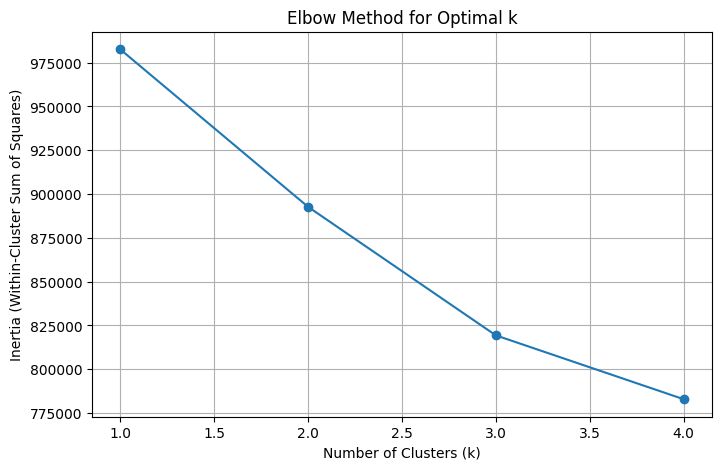

In [213]:
for k in krange:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_encoded_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(krange, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [214]:
final_encoded_df.head()

,avg_bicarbonate,avg_blood_glucose,avg_blood_urea_nitrogen,avg_creatinine,age,avg_dias_press,avg_hematrocrit,avg_hr,avg_platelet_count,avg_potasssium,avg_resp_rate,avg_sodium,avg_spo2,avg_sys_press,avg_white_blood_cells,gender,marital_status,religion,ethnicity
0,-1.473252,0.828822,0.170325,0.481021,-1.666025,1.205394,0.061765,0.051446,1.144003,-0.206467,-0.026520,0.246522,-0.003177,1.885942,-0.064525,0,0,1,5
1,-1.485602,-0.933666,0.492694,-0.180693,-0.247380,-0.043498,-0.890657,-0.012032,-0.814228,1.686891,-0.045830,-1.868840,-0.000452,-0.157057,0.341135,1,2,4,5
2,1.034785,-0.723831,-0.454696,-0.440985,-0.885717,0.793399,-0.004257,0.045786,-0.069605,-0.102105,-0.010336,-2.040771,-0.002054,0.692775,-0.161487,0,2,4,1
3,-0.131199,-0.381244,-0.609923,-0.424483,0.560174,0.210788,-0.277194,-0.015773,-0.327543,-0.409471,-0.003584,0.117915,-0.001623,0.701184,-0.483541,0,1,2,5
4,-0.050511,0.489834,-0.458879,-0.356222,-0.196037,-0.410024,0.879621,-0.037868,-0.838483,0.318125,0.050750,-0.272341,-0.009408,-0.368729,0.210532,1,1,1,5


In [215]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
final_encoded_df['kmeans_cluster'] = kmeans.fit_predict(final_encoded_df)

final_encoded_df['kmeans_cluster'].value_counts()

kmeans_cluster
0    35169
1    12159
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

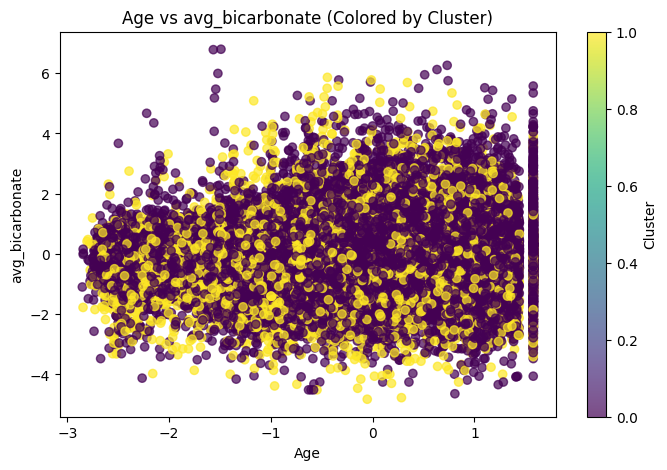

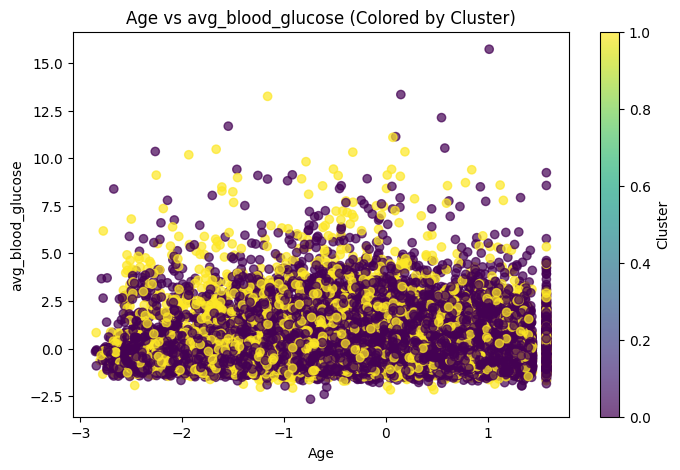

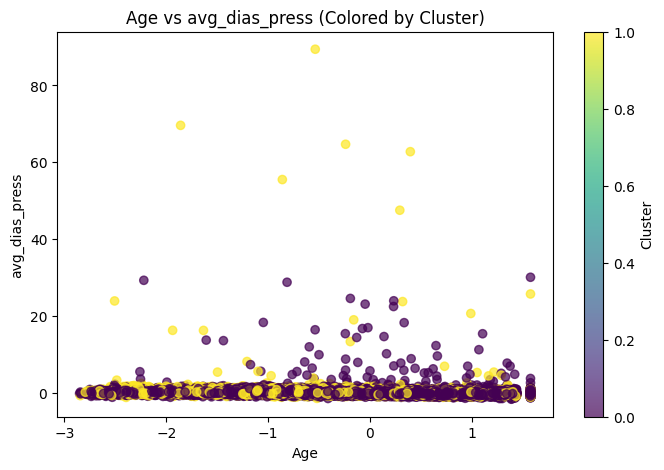

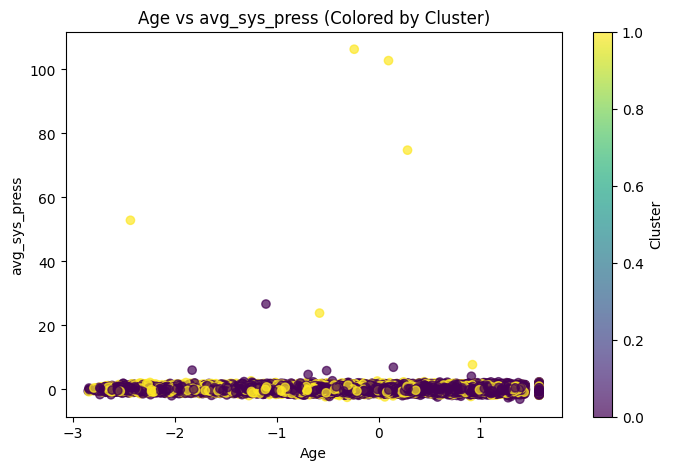

In [217]:
variables_to_plot = [
    'avg_bicarbonate', 'avg_blood_glucose', 'avg_dias_press', 'avg_sys_press', 
]

plt.figure(figsize=(12, 8))

for var in variables_to_plot:
    plt.figure(figsize=(8, 5))
    plt.scatter(final_encoded_df['age'], final_encoded_df[var], 
                c=final_encoded_df['kmeans_cluster'], cmap='viridis', alpha=0.7)
    plt.xlabel('Age')
    plt.ylabel(var)
    plt.title(f'Age vs {var} (Colored by Cluster)')
    plt.colorbar(label='Cluster')
    plt.show()

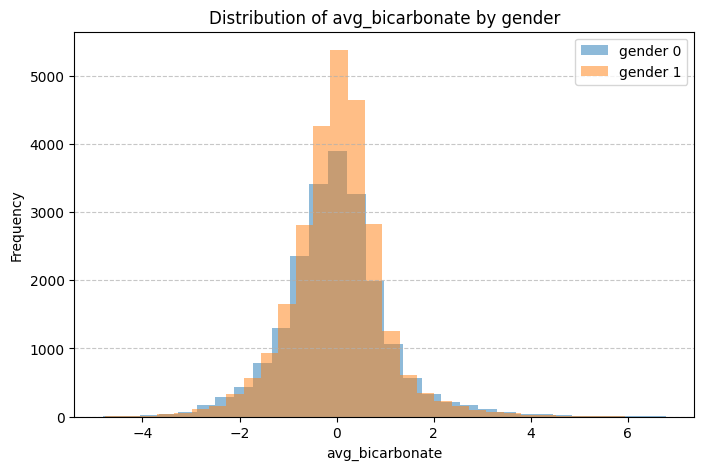

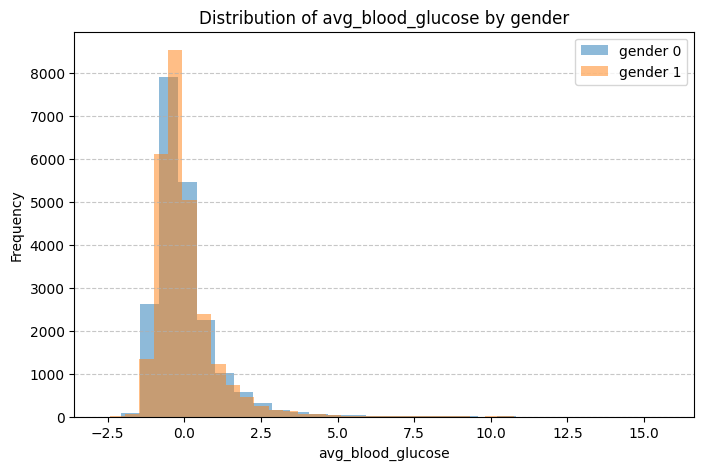

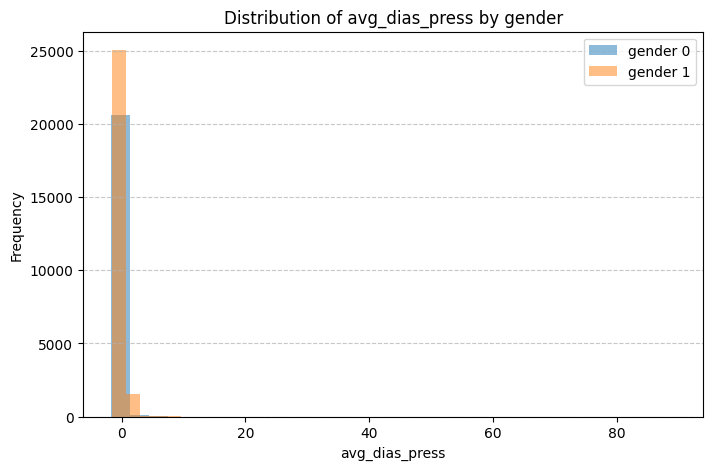

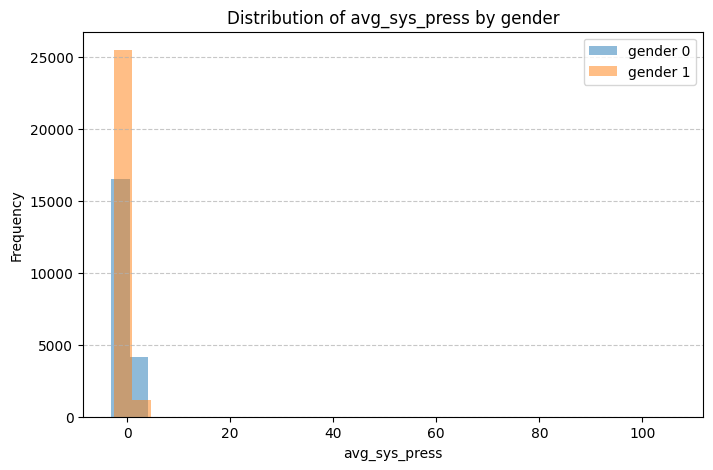

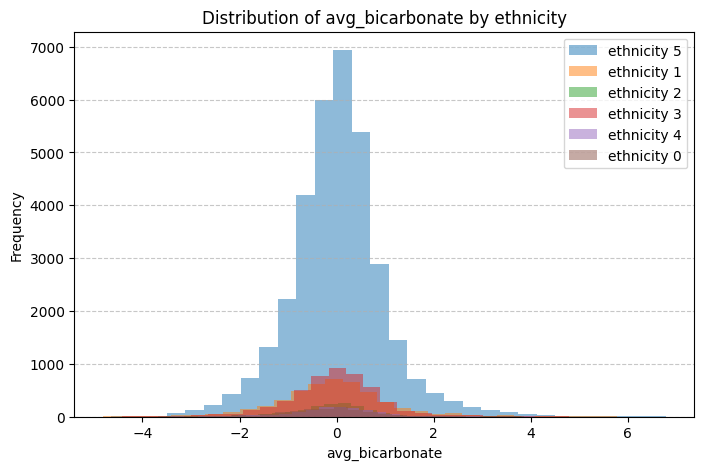

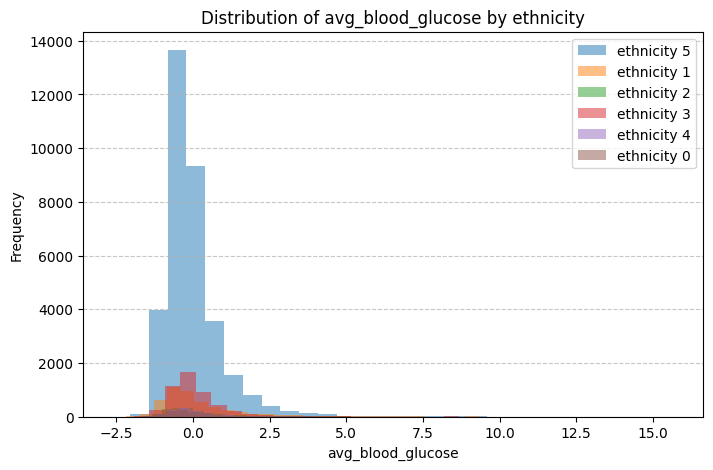

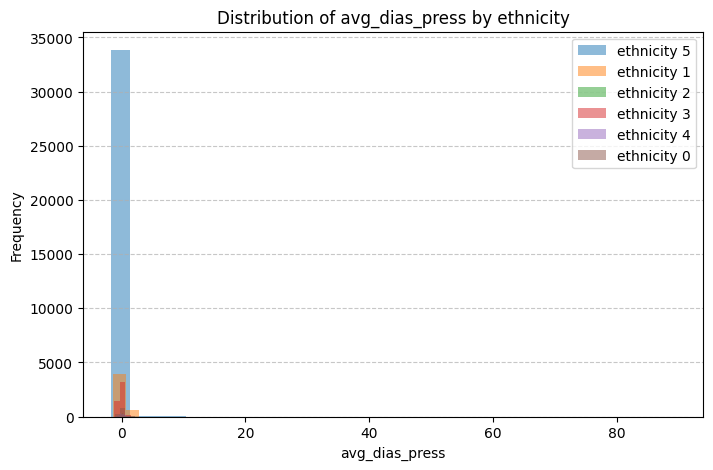

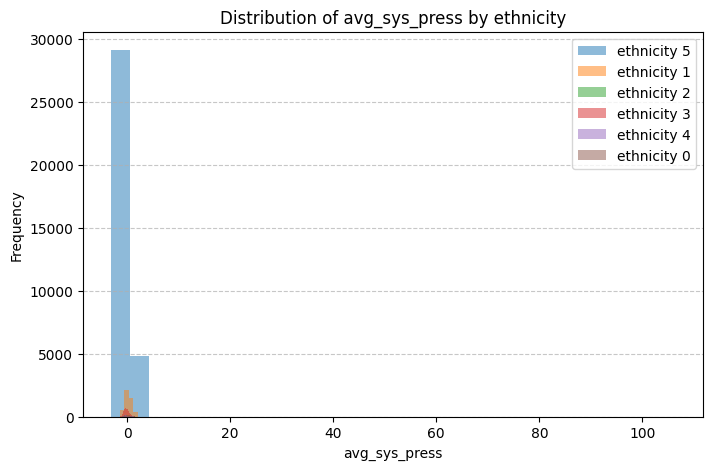

In [241]:
categorical_vars = ['gender', 'ethnicity']
lab_test_vars = ['avg_bicarbonate', 'avg_blood_glucose', 'avg_dias_press', 'avg_sys_press', ]

for cat_var in categorical_vars:
    for lab_var in lab_test_vars:
        plt.figure(figsize=(8, 5))
        for category in final_encoded_df[cat_var].unique():
            subset = final_encoded_df[final_encoded_df[cat_var] == category]
            plt.hist(subset[lab_var], alpha=0.5, label=f'{cat_var} {category}', bins=30)

        plt.xlabel(lab_var)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {lab_var} by {cat_var}')
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

In [243]:
lab_test_vars = [
'avg_bicarbonate',            
'avg_blood_glucose',          
'avg_blood_urea_nitrogen',    
'avg_creatinine',                                                    
'avg_dias_press',            
'avg_hematrocrit',            
'avg_hr',                     
'avg_platelet_count',         
'avg_potasssium',             
'avg_resp_rate',              
'avg_sodium',                
'avg_spo2',                   
'avg_sys_press',              
'avg_white_blood_cells',
]

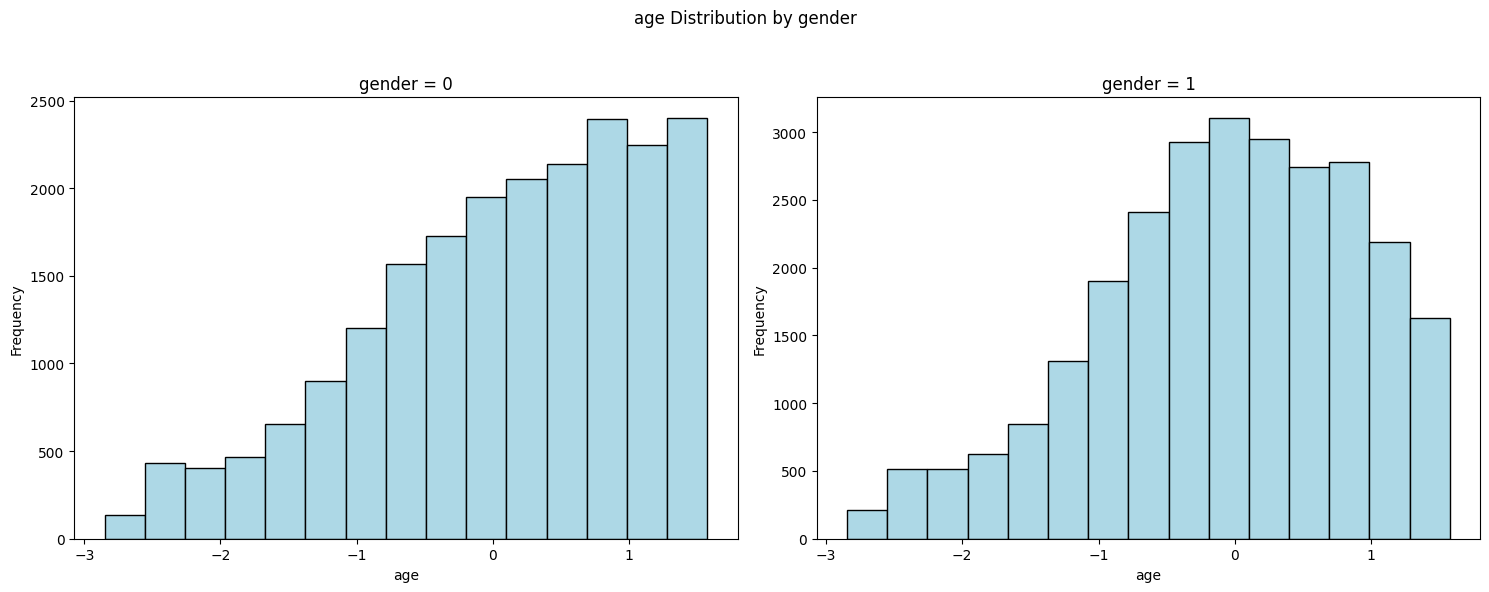

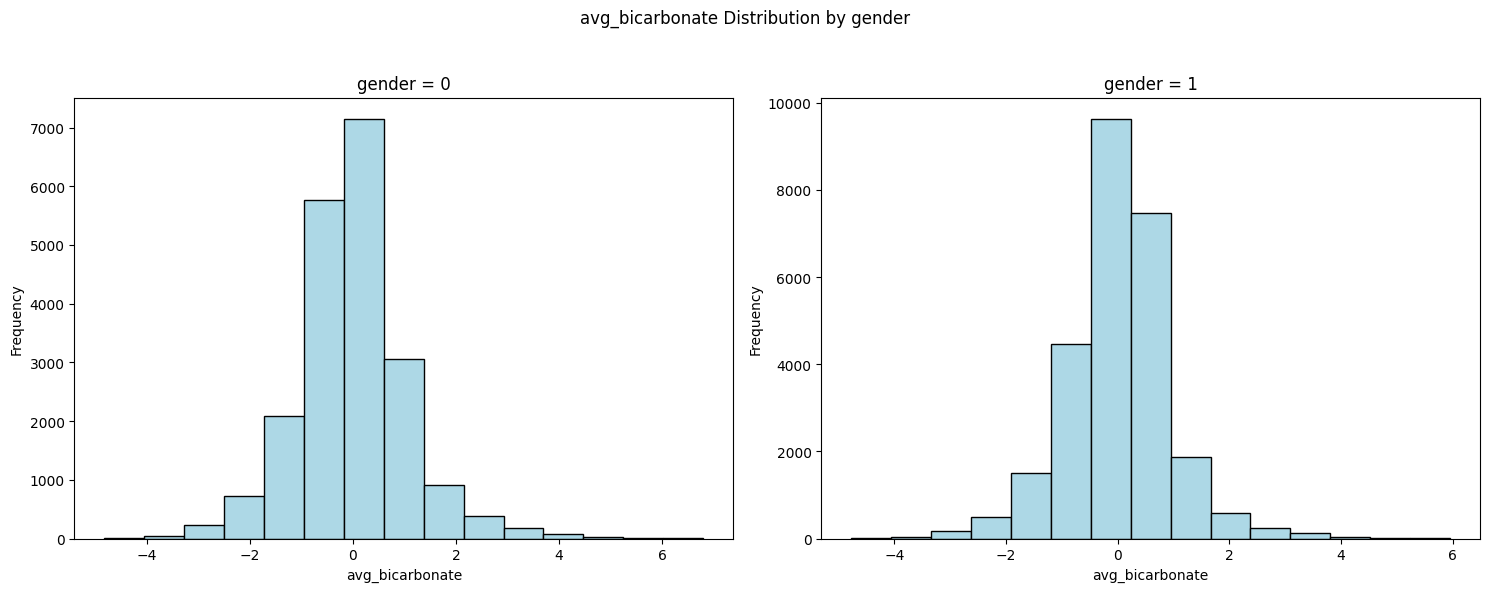

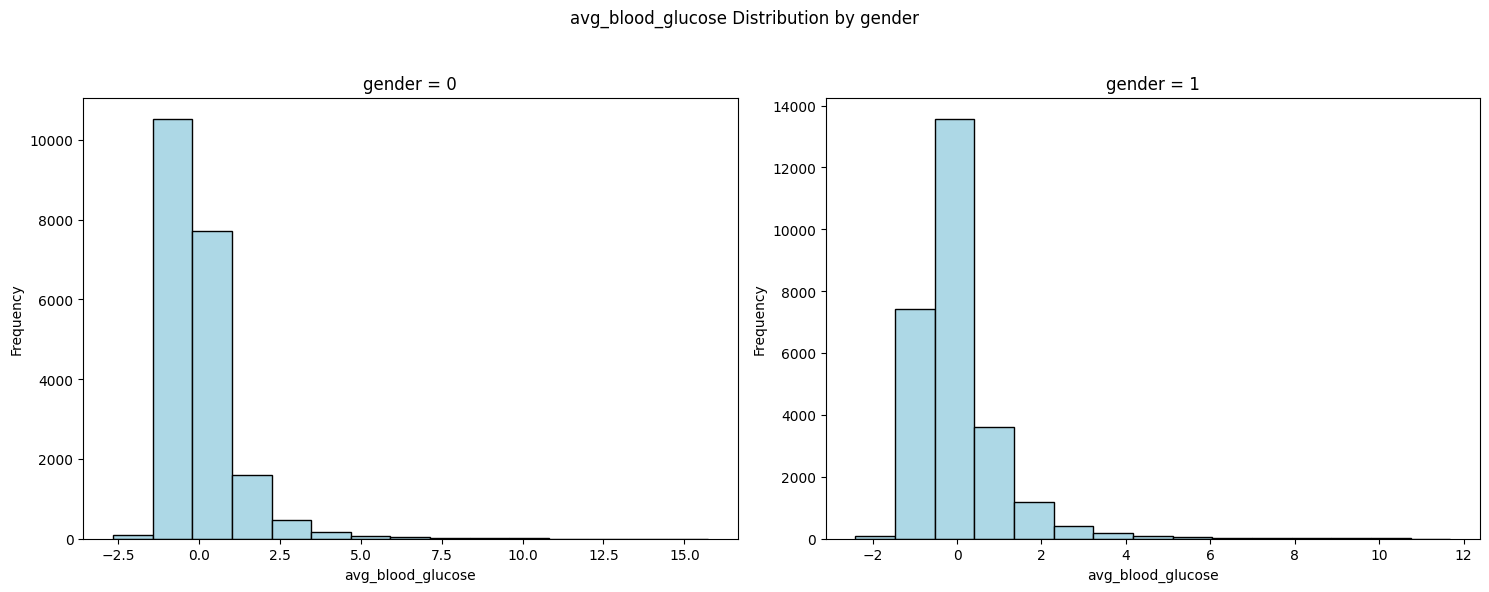

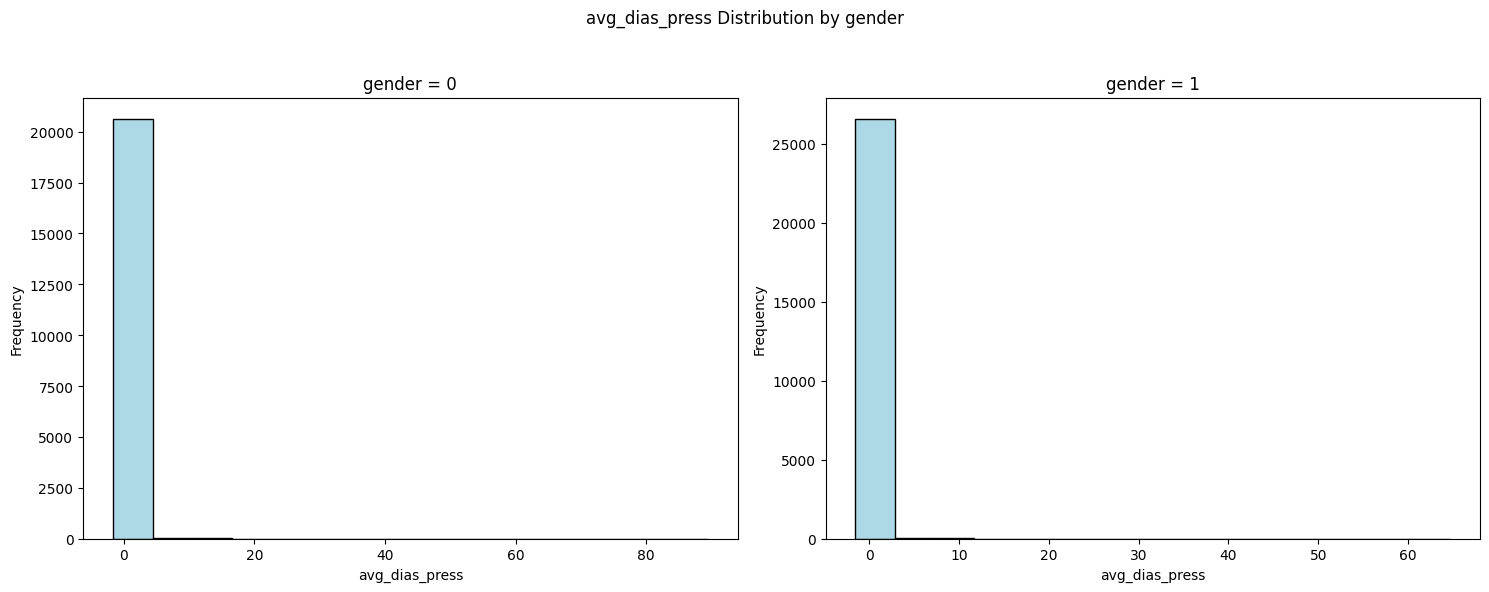

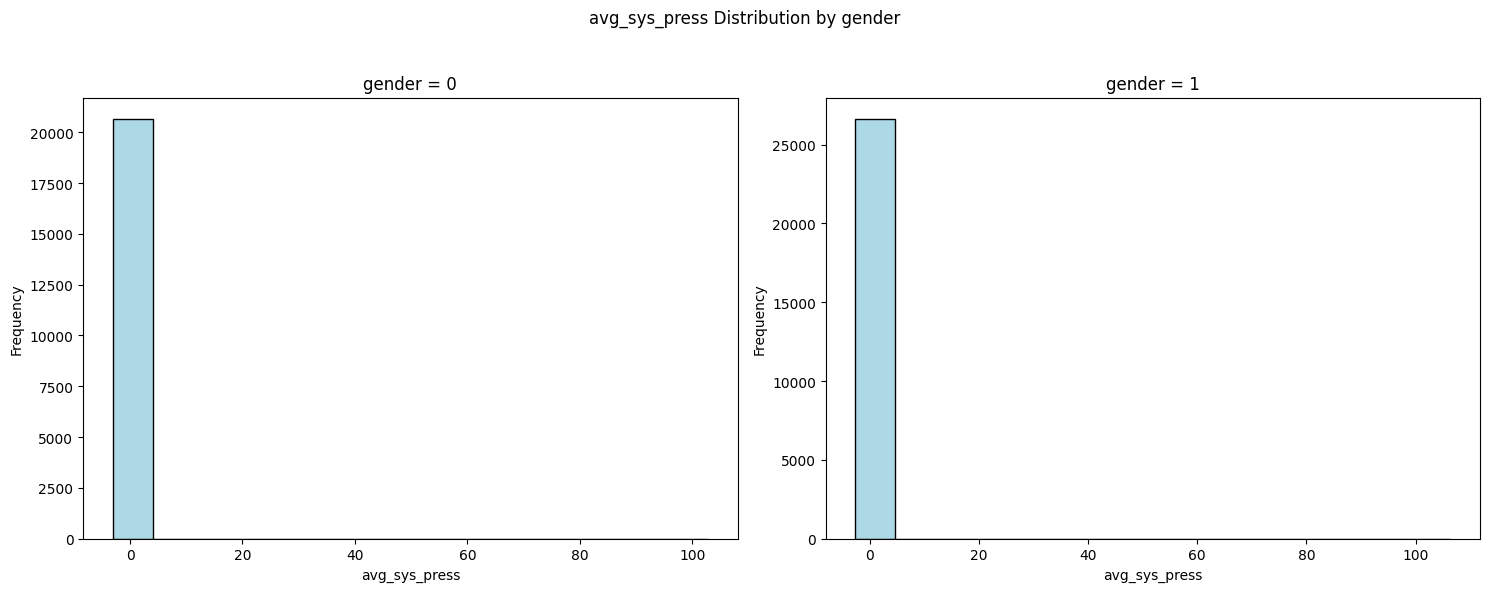

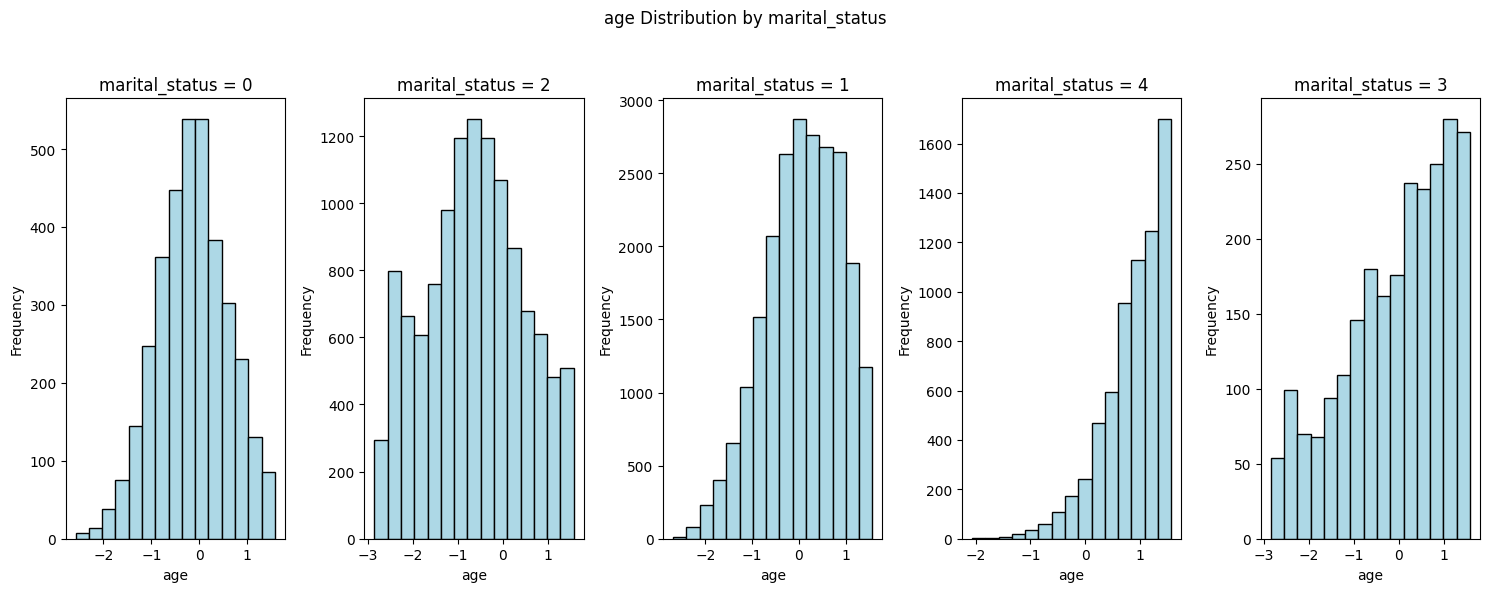

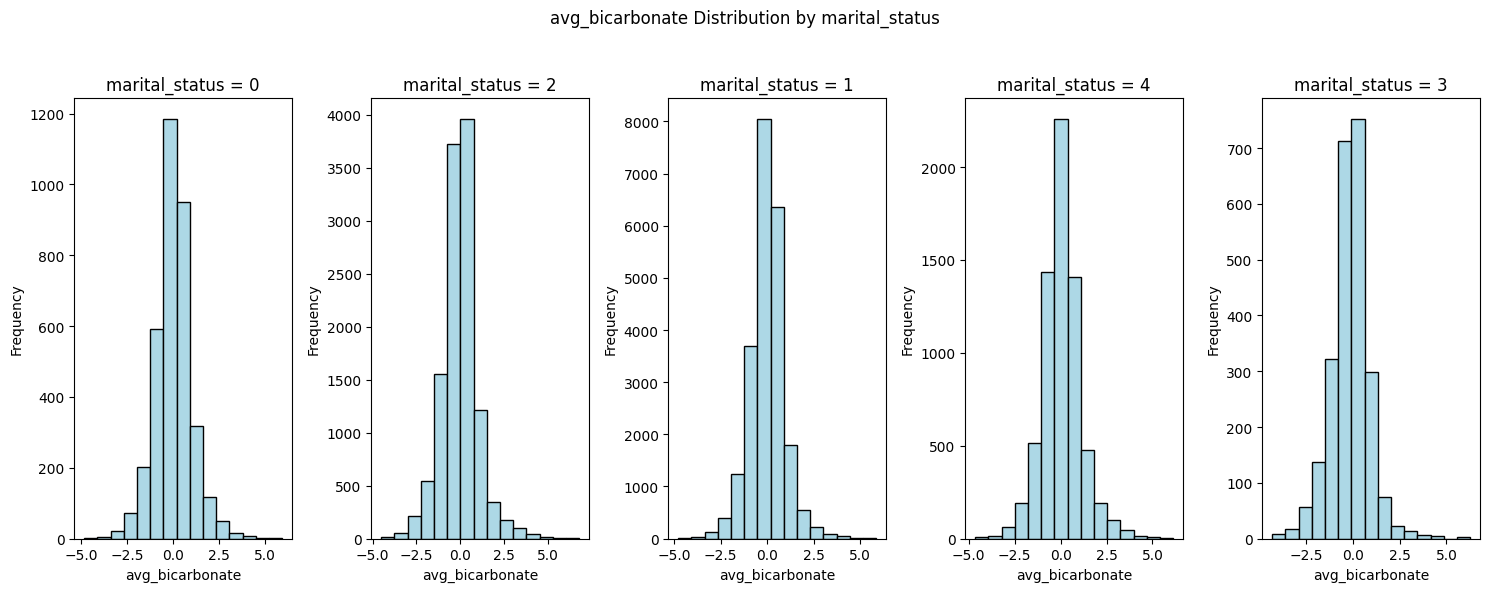

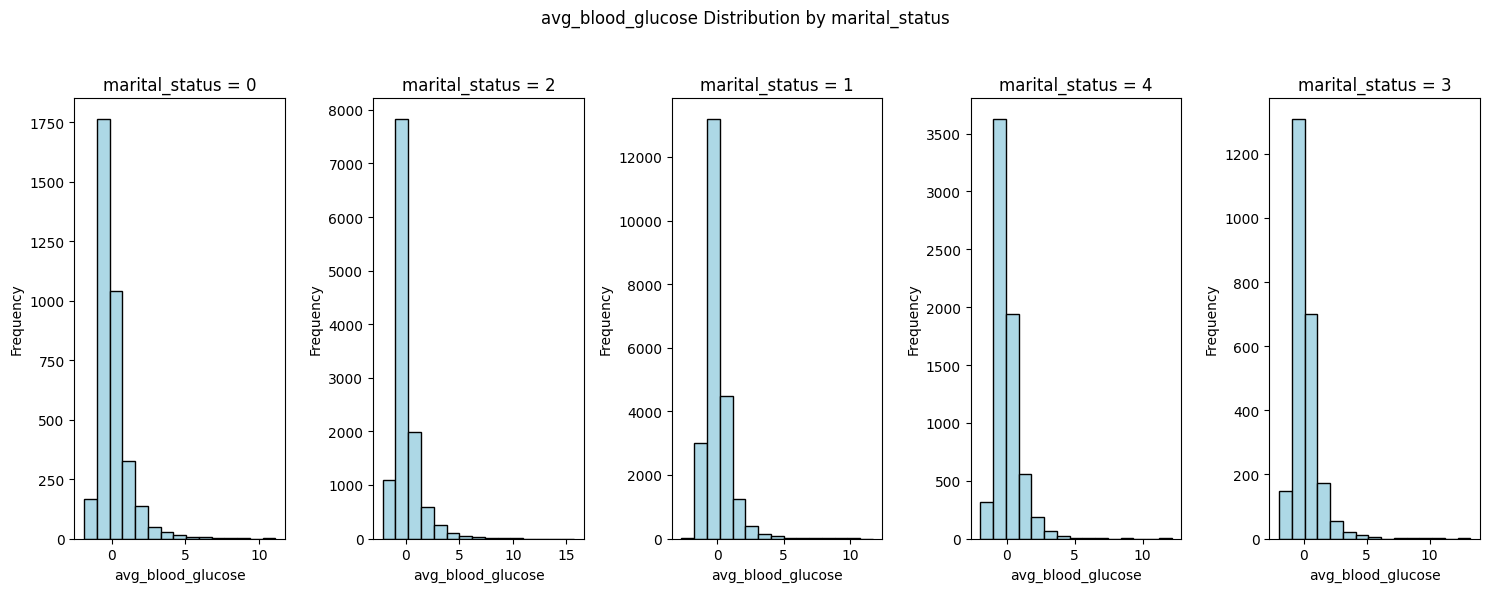

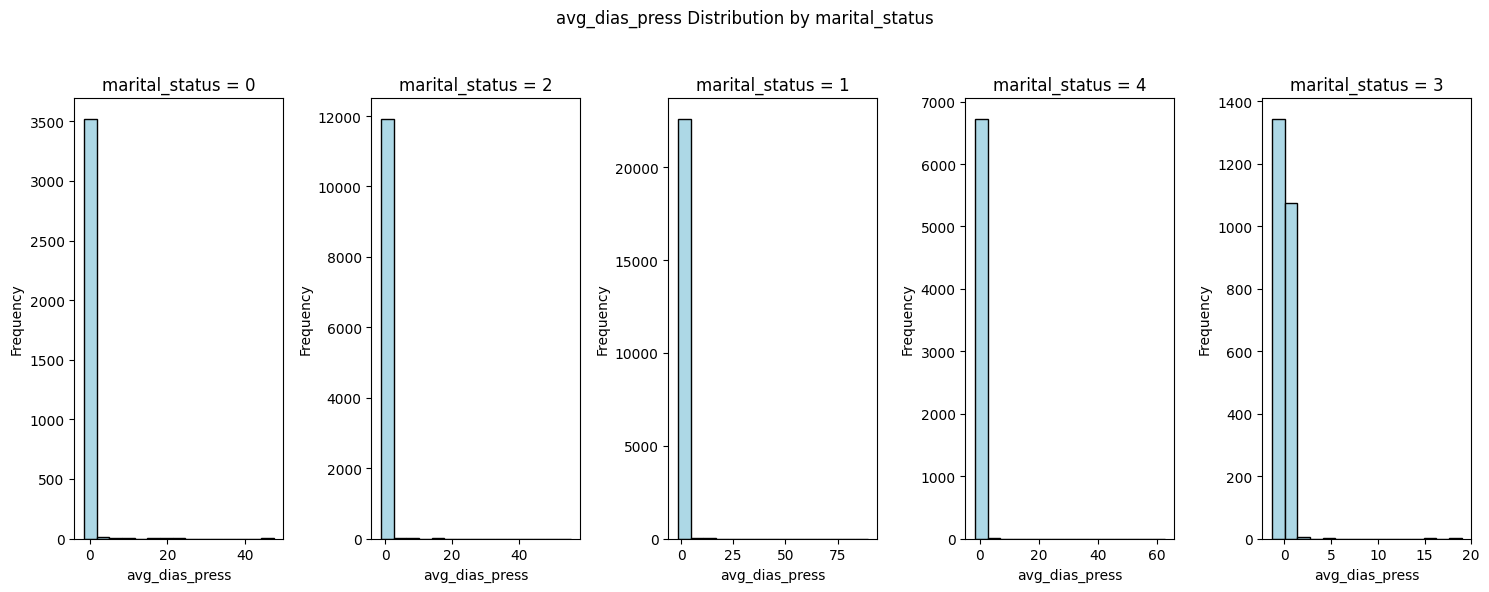

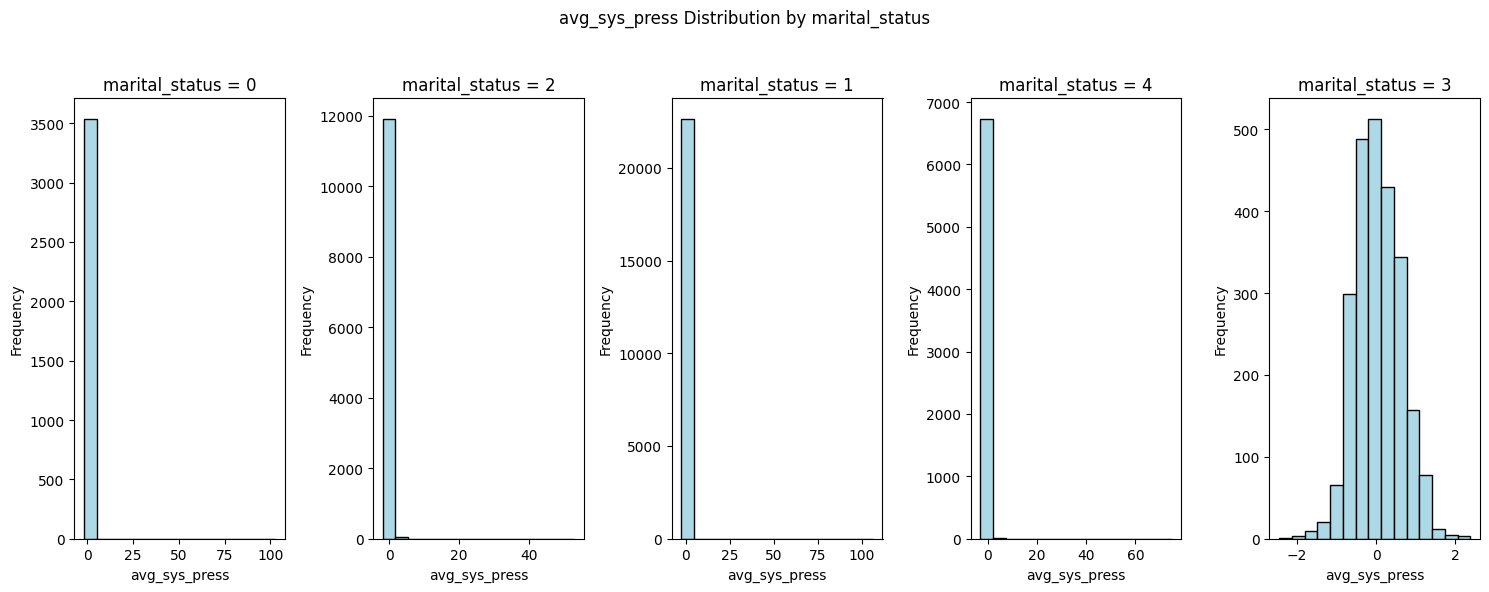

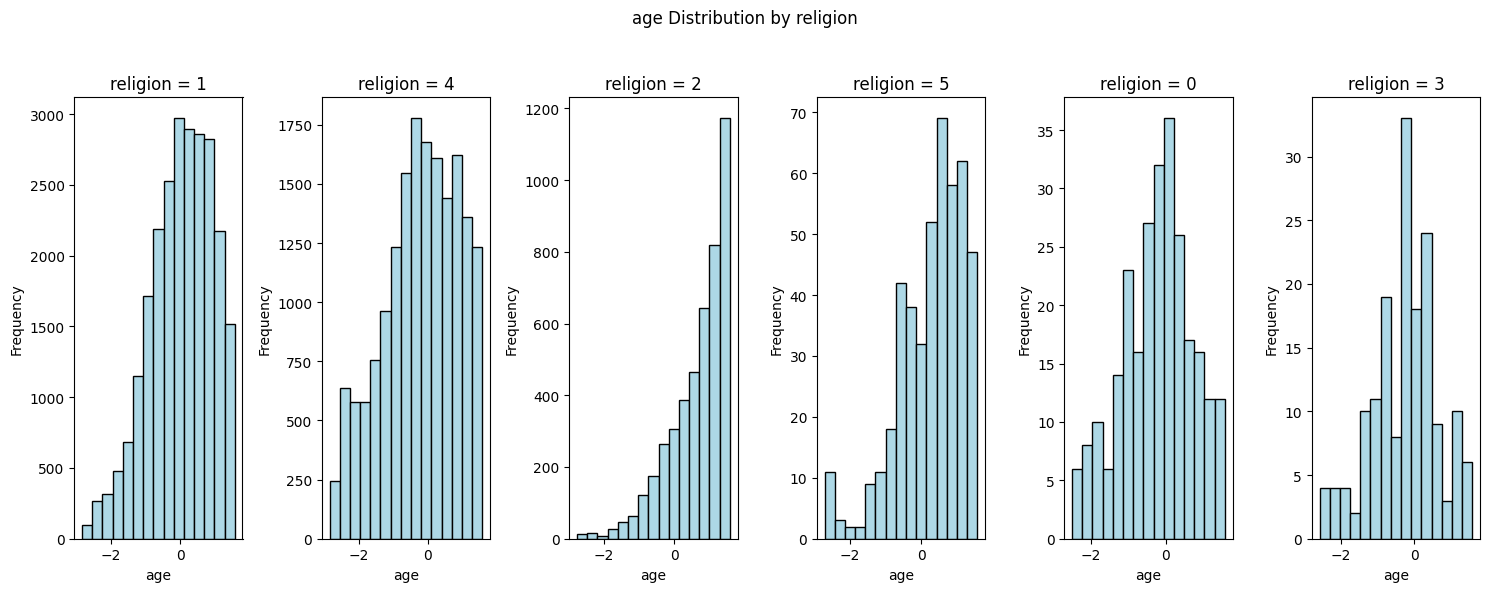

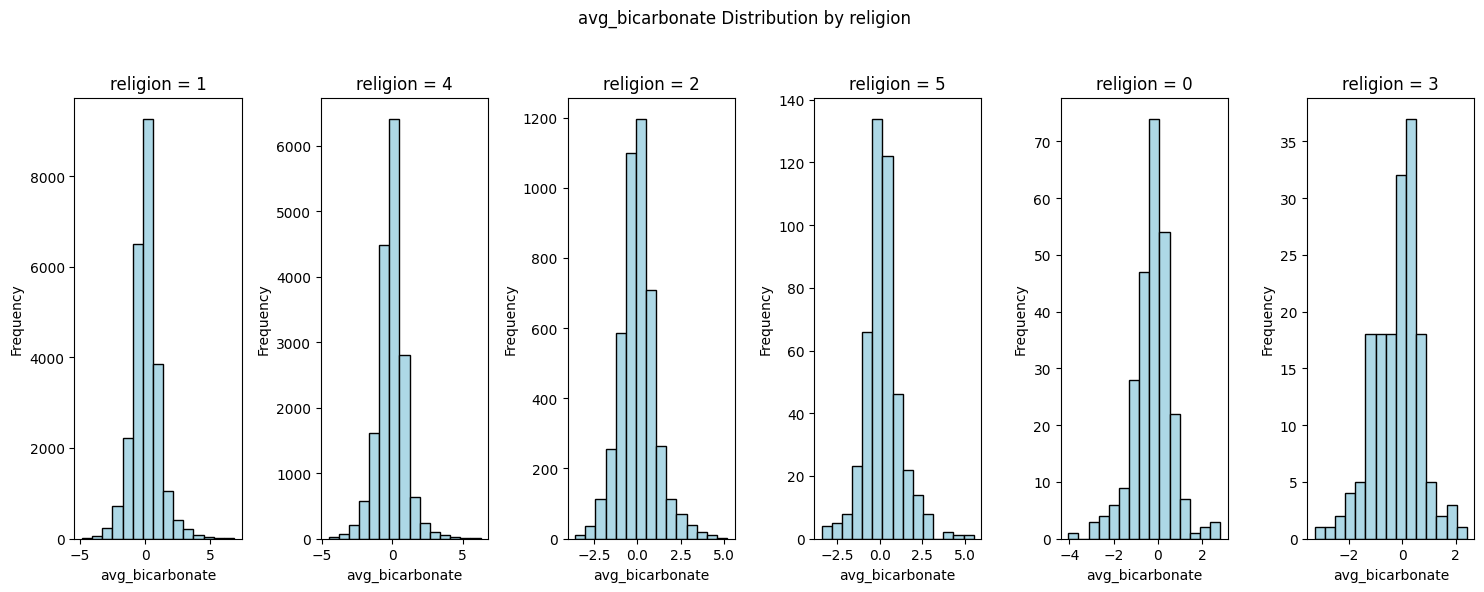

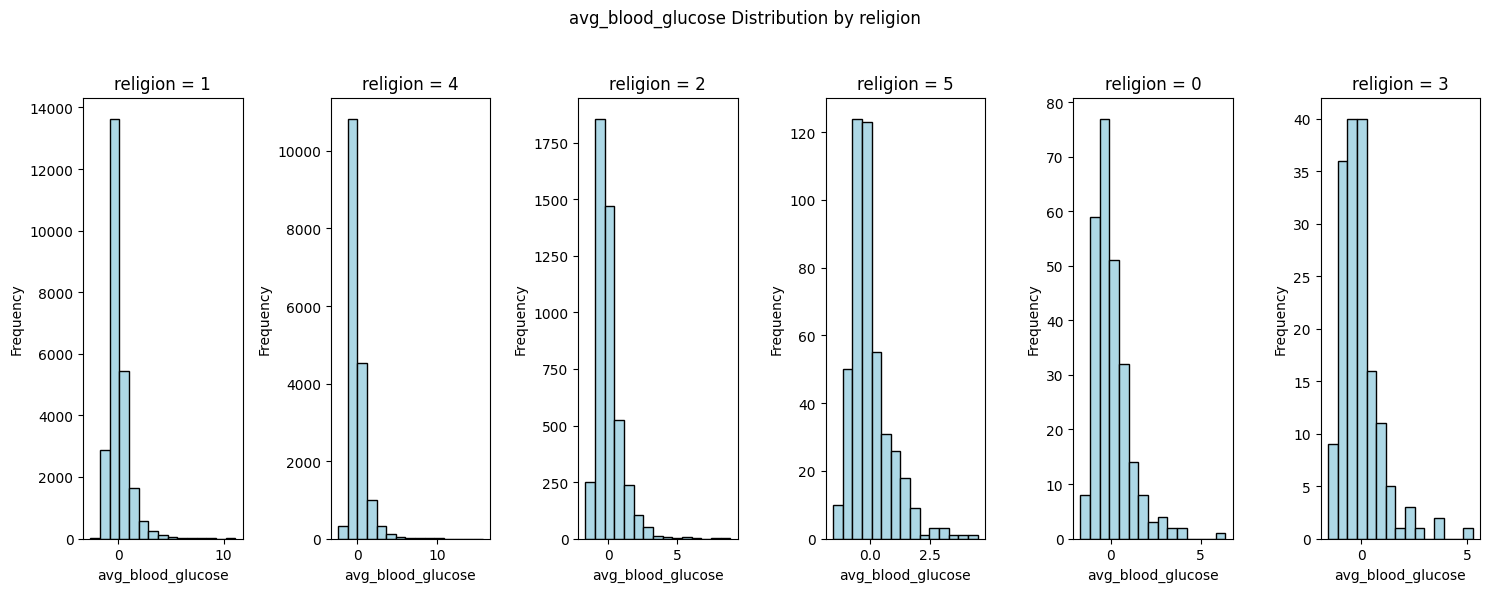

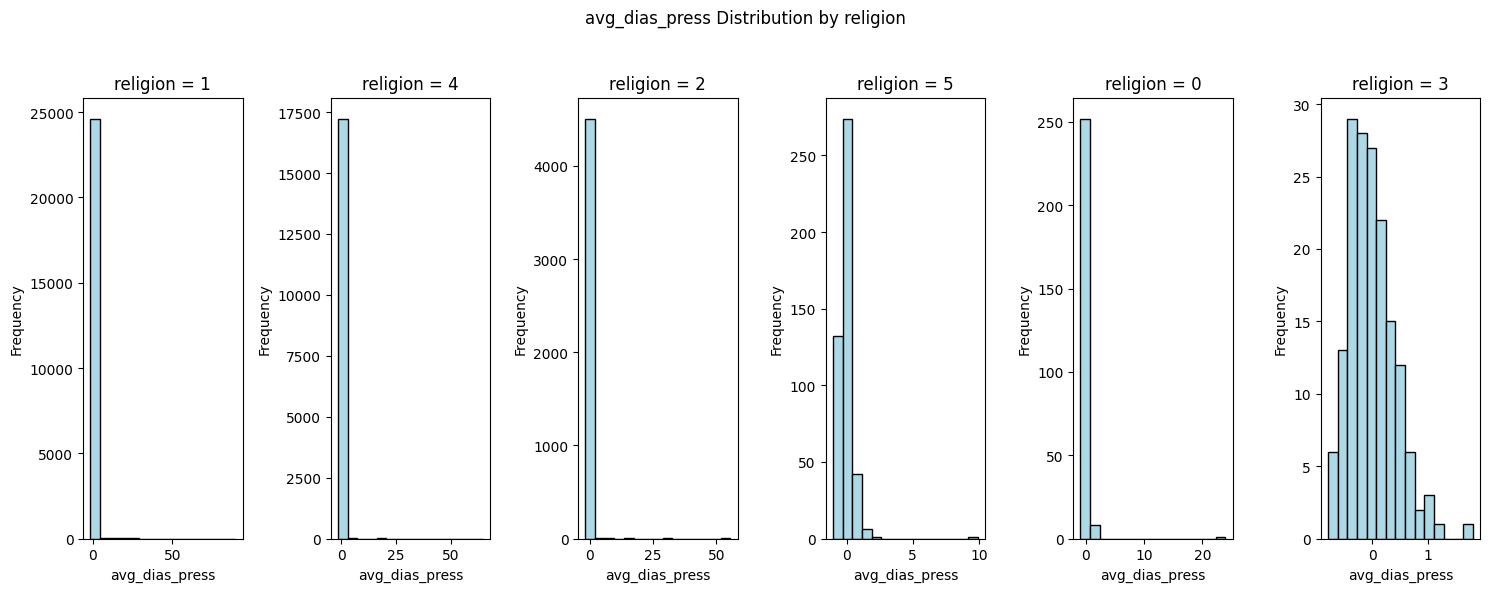

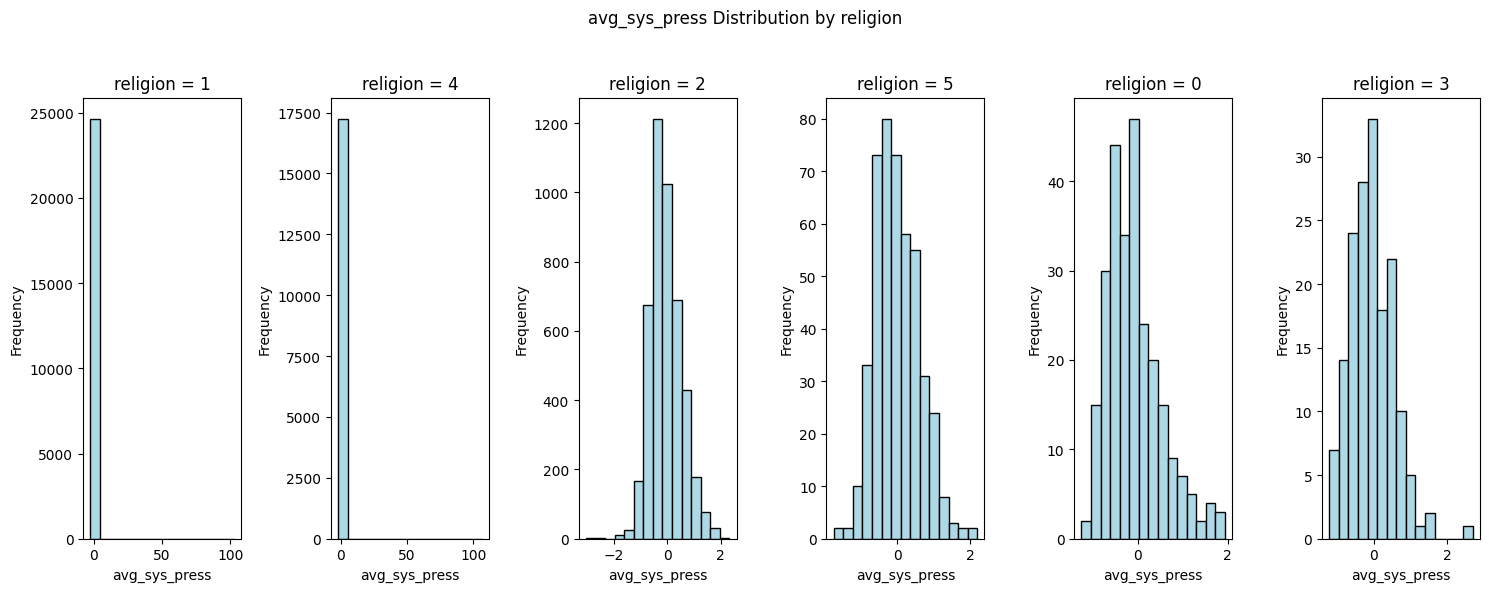

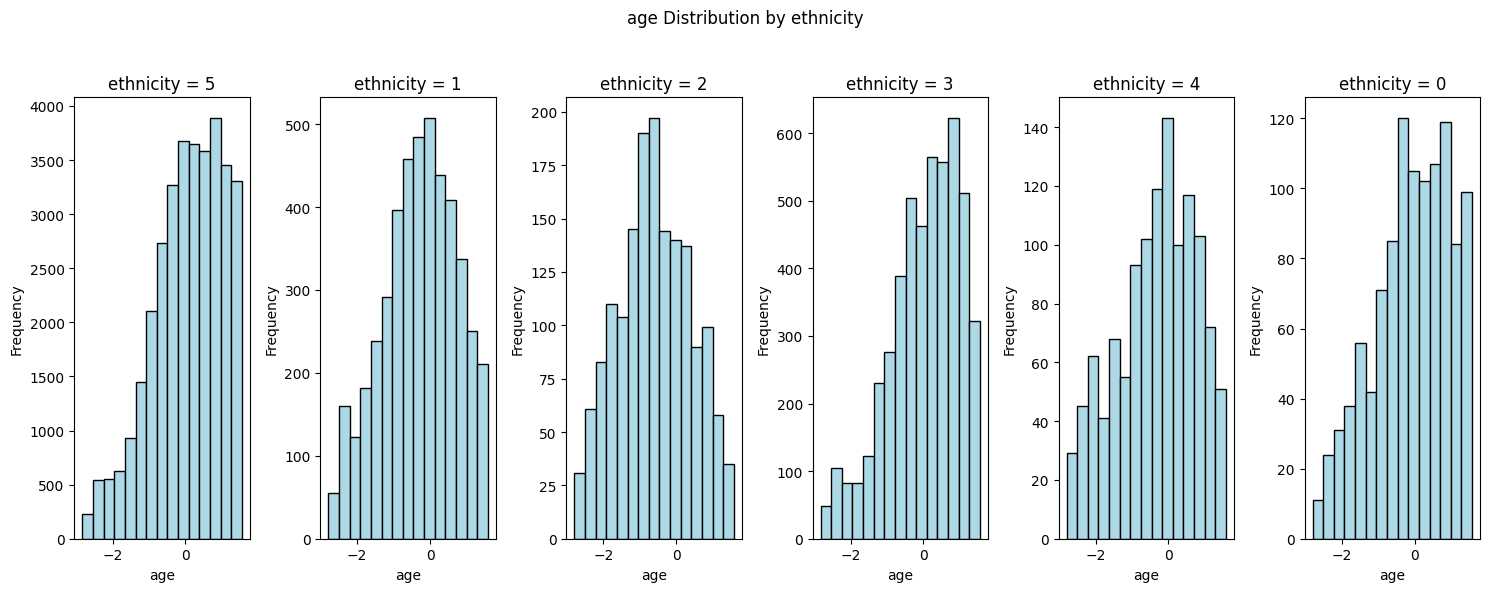

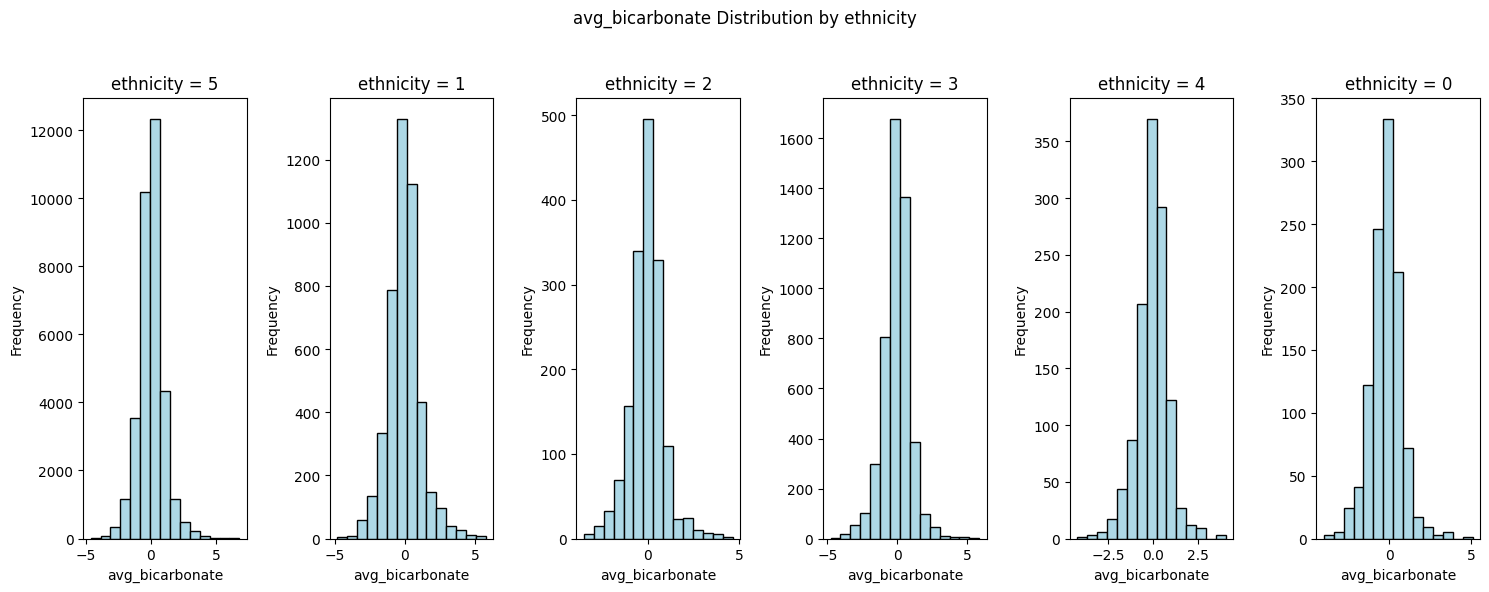

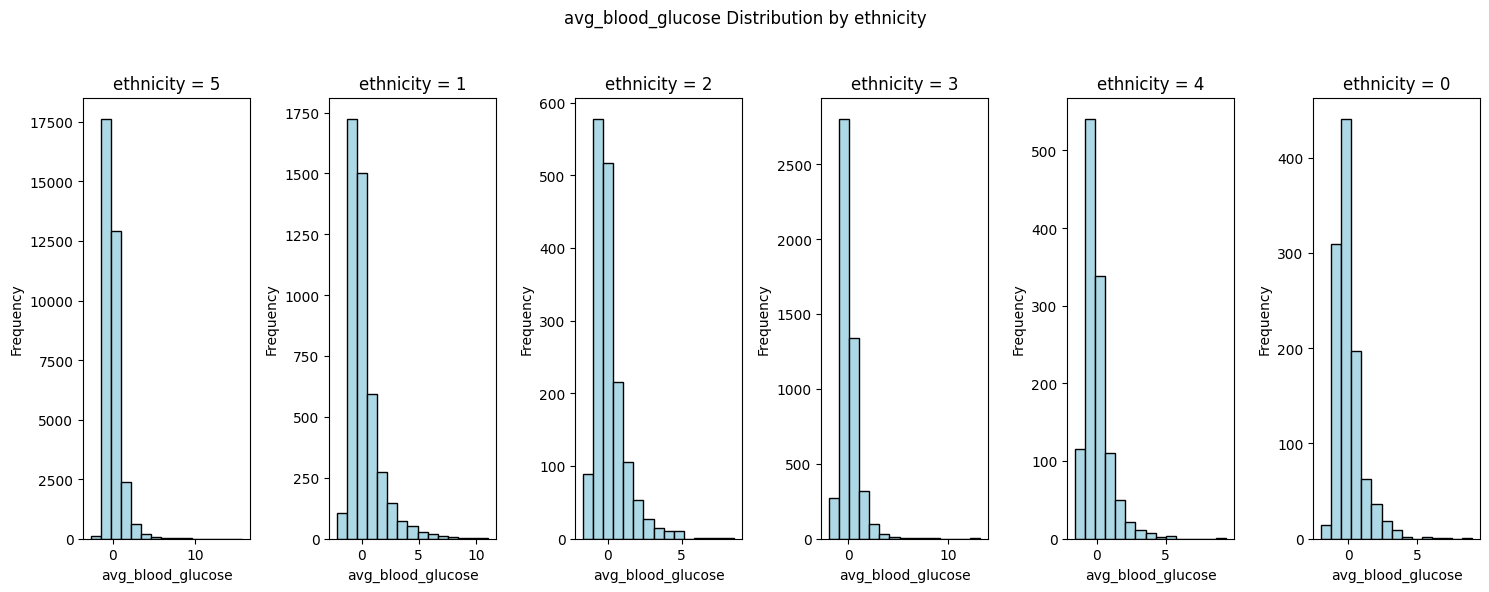

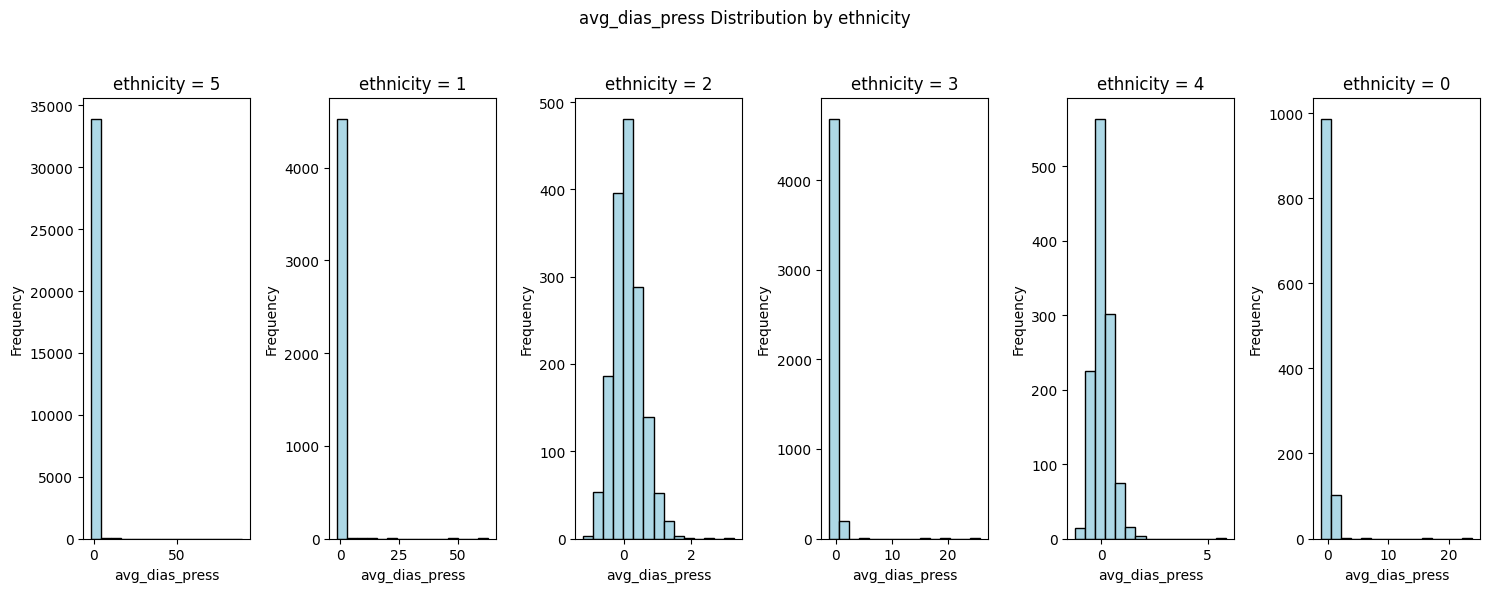

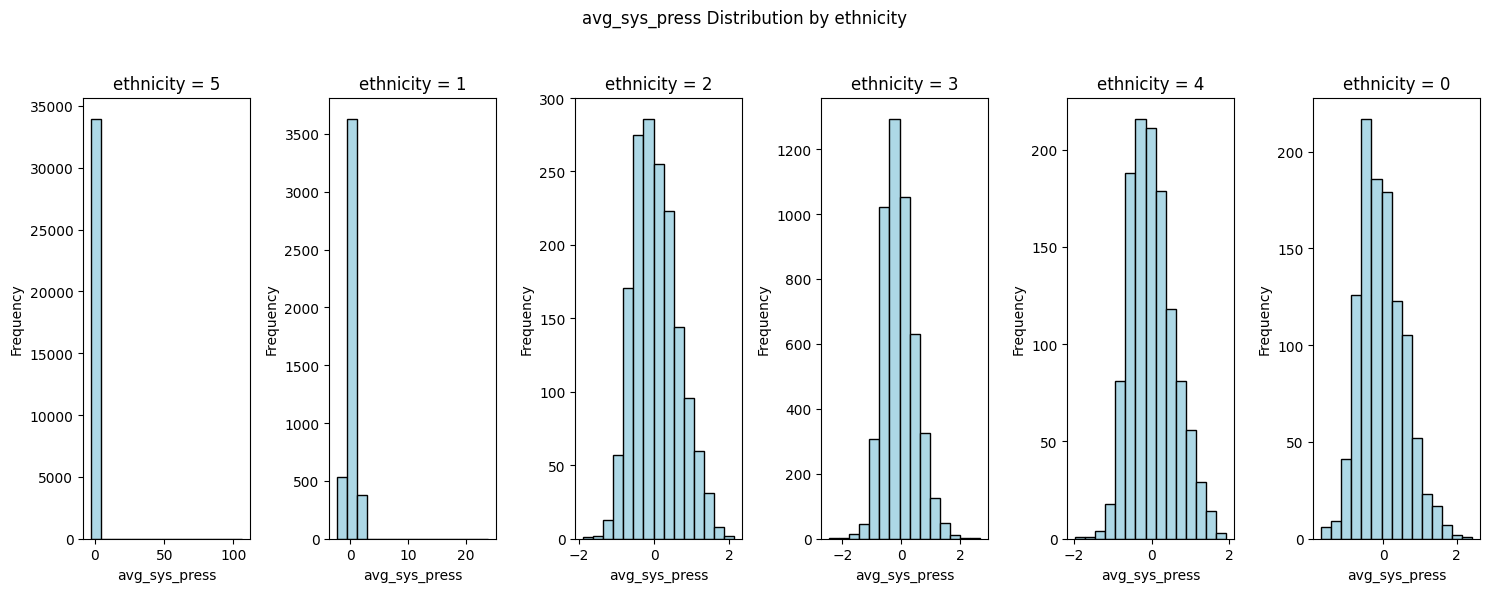

In [248]:
categorical_features = ['gender', 'marital_status', 'religion', 'ethnicity']
numerical_features = ['age', 'avg_bicarbonate', 'avg_blood_glucose', 'avg_dias_press', 'avg_sys_press']

for cat in categorical_features:
    for num in numerical_features:
        categories = final_encoded_df[cat].unique()

        plt.figure(figsize=(15, 6))
        for i, cat_val in enumerate(categories):
            subset = final_encoded_df[final_encoded_df[cat] == cat_val]
            plt.subplot(1, len(categories), i + 1)
            plt.hist(subset[num], bins=15, color='lightblue', edgecolor='black')
            plt.title(f'{cat} = {cat_val}')
            plt.xlabel(num)
            plt.ylabel('Frequency')

        plt.suptitle(f'{num} Distribution by {cat}')
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

### Hierarchical by sampling to ease computational complexity 

In [268]:
sampled_df = final_encoded_df.sample(n=500, random_state=42)

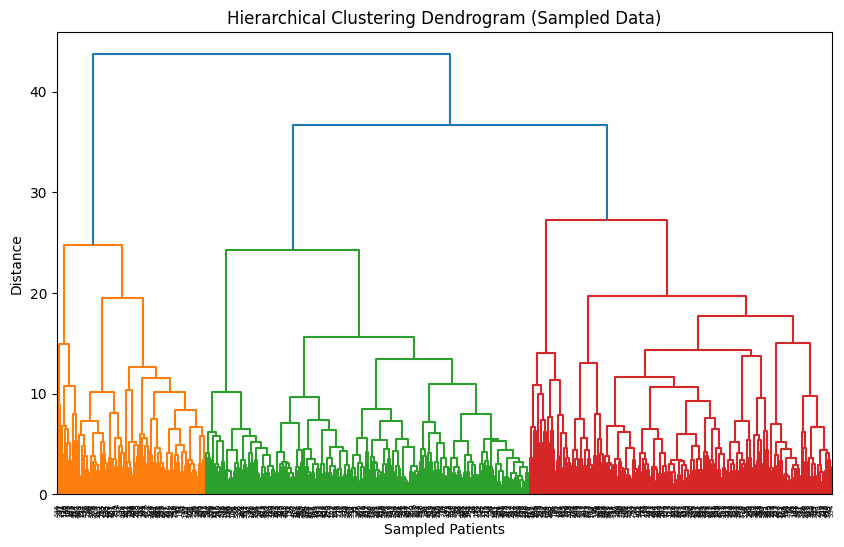

In [269]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(sampled_df.drop(columns=['kmeans_cluster']), method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Sampled Patients')
plt.ylabel('Distance')
plt.show()

In [270]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 3

sampled_df['hierarchical_cluster'] = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
sampled_df['hierarchical_cluster'].value_counts()

hierarchical_cluster
2    209
3    195
1     96
Name: count, dtype: int64

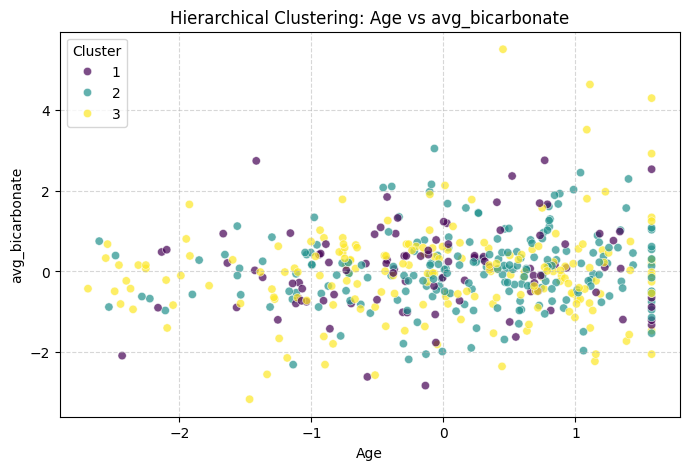

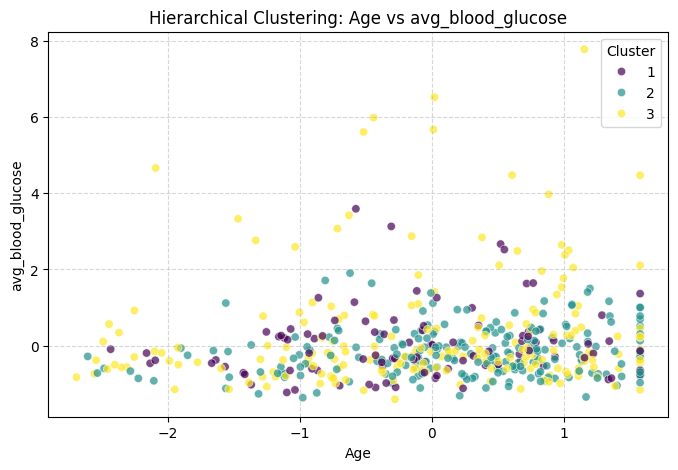

In [272]:
variables_to_plot = [
    'avg_bicarbonate', 'avg_blood_glucose'
]
for var in variables_to_plot:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        x='age',
        y=var,
        hue='hierarchical_cluster',
        data=sampled_df,
        palette='viridis',
        alpha=0.7
    )
    plt.title(f'Hierarchical Clustering: Age vs {var}')
    plt.xlabel('Age')
    plt.ylabel(var)
    plt.legend(title='Cluster')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

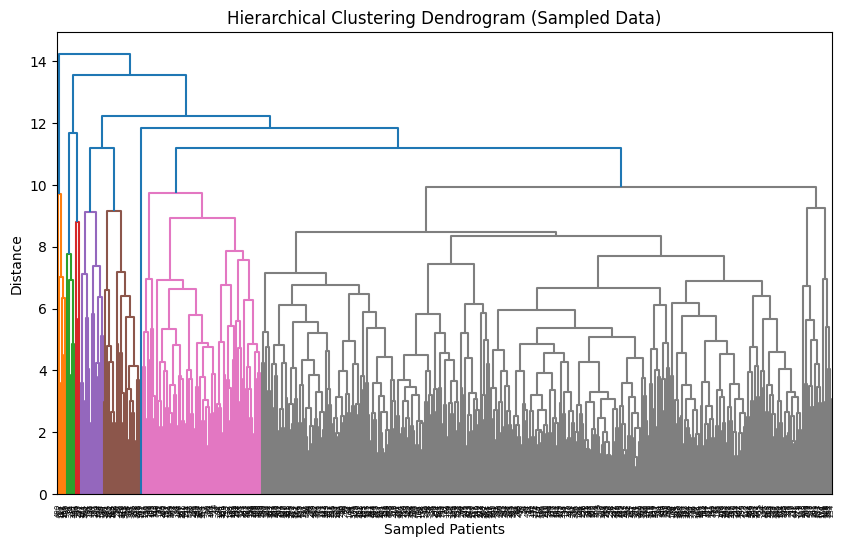

In [263]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(sampled_df.drop(columns=['kmeans_cluster']), method='complete')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Sampled Patients')
plt.ylabel('Distance')
plt.show()

In [273]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 3

sampled_df['hierarchical_cluster'] = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
sampled_df['hierarchical_cluster'].value_counts()

hierarchical_cluster
2    209
3    195
1     96
Name: count, dtype: int64

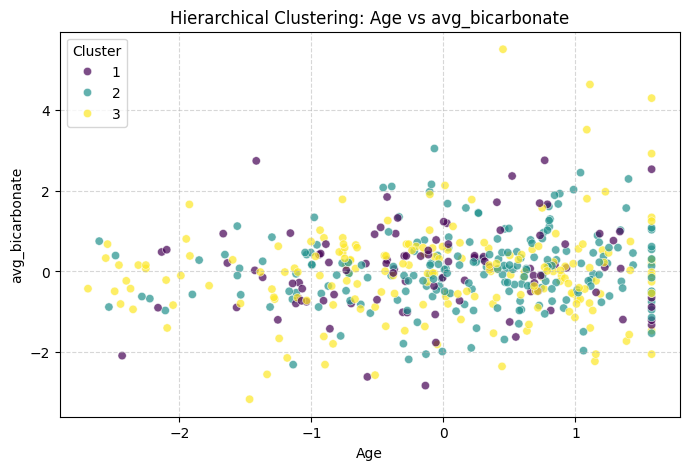

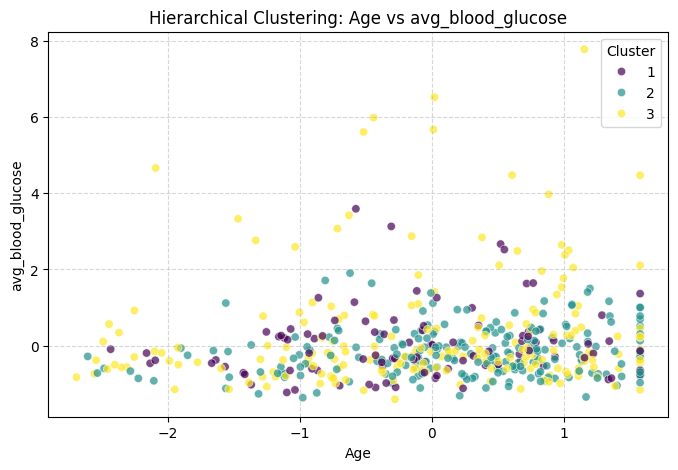

In [275]:
variables_to_plot = [
    'avg_bicarbonate', 'avg_blood_glucose'
]
for var in variables_to_plot:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        x='age',
        y=var,
        hue='hierarchical_cluster',
        data=sampled_df,
        palette='viridis',
        alpha=0.7
    )
    plt.title(f'Hierarchical Clustering: Age vs {var}')
    plt.xlabel('Age')
    plt.ylabel(var)
    plt.legend(title='Cluster')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

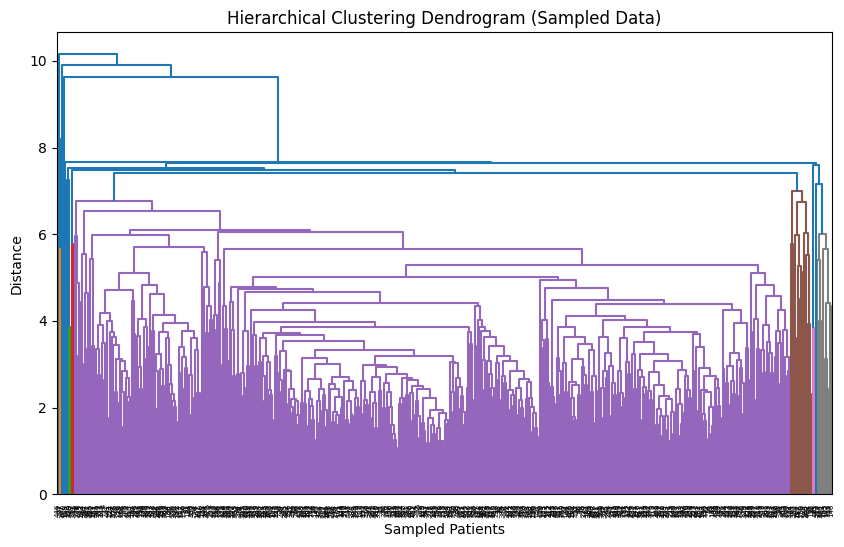

In [277]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(sampled_df.drop(columns=['kmeans_cluster']), method='average')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Sampled Patients')
plt.ylabel('Distance')
plt.show()

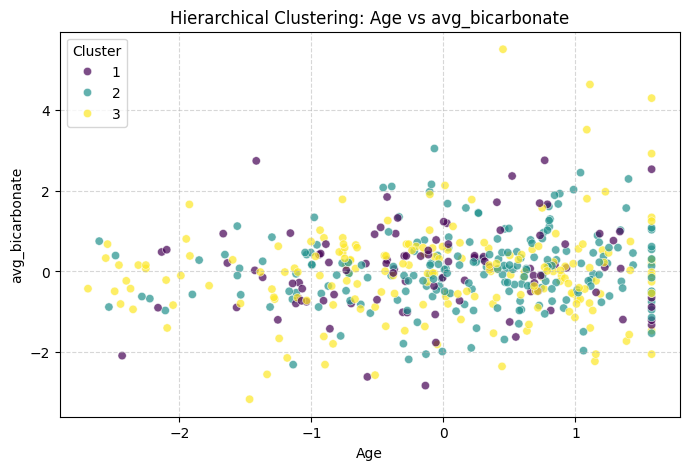

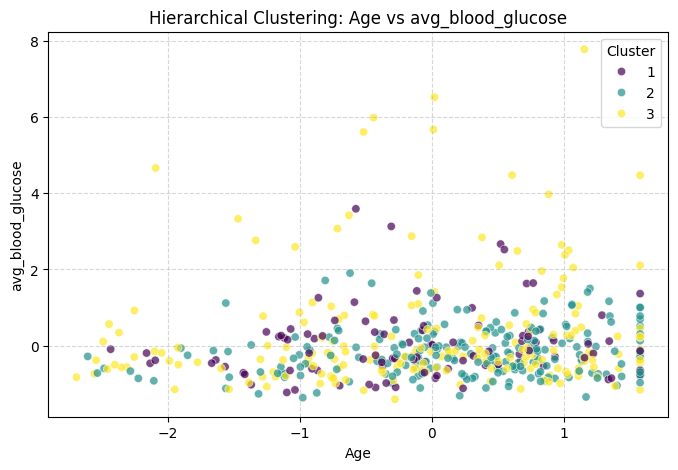

In [278]:
variables_to_plot = [
    'avg_bicarbonate', 'avg_blood_glucose'
]
for var in variables_to_plot:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        x='age',
        y=var,
        hue='hierarchical_cluster',
        data=sampled_df,
        palette='viridis',
        alpha=0.7
    )
    plt.title(f'Hierarchical Clustering: Age vs {var}')
    plt.xlabel('Age')
    plt.ylabel(var)
    plt.legend(title='Cluster')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

This project showed how clustering can be used to find patterns in complex healthcare data. K Means gave a basic grouping of patients, but it did not work very well because it assumes the groups are similar in size and shape, which was not the case here. Hierarchical Clustering, especially with the Ward method, gave more useful and clearer results.

The analysis also showed that patient data is highly varied, and proper data cleaning and preparation is very important. Choosing the right clustering method is key to finding real patterns that simple statistics might miss.